In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Pre-processing 

In [171]:
df = pd.read_csv("merged_dataset.csv")

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21694 entries, 0 to 21693
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     21694 non-null  int64  
 1   Year                           21694 non-null  int64  
 2   ICD10 Code                     21694 non-null  object 
 3   ICD10 Diagnosis                21694 non-null  object 
 4   Diagnosis Type                 21694 non-null  object 
 5   Sex                            21694 non-null  object 
 6   Deaths                         21694 non-null  float64
 7   admissions                     21694 non-null  float64
 8   Age Group                      21694 non-null  object 
 9   Addicts(Age Group)             21694 non-null  int64  
 10  Therapy_Cost                   21694 non-null  int64  
 11  Real_Households_Income         21694 non-null  float64
 12  Household_Expenditure_Tobacco  21694 non-null 

Unnamed column with useless indexing needs to be removed

In [173]:
df =df.loc[:, ~df.columns.str.contains('^Unnamed')]


print(f"Shape after dropping unnamed columns: {df.shape}")

Shape after dropping unnamed columns: (21694, 12)


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21694 entries, 0 to 21693
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           21694 non-null  int64  
 1   ICD10 Code                     21694 non-null  object 
 2   ICD10 Diagnosis                21694 non-null  object 
 3   Diagnosis Type                 21694 non-null  object 
 4   Sex                            21694 non-null  object 
 5   Deaths                         21694 non-null  float64
 6   admissions                     21694 non-null  float64
 7   Age Group                      21694 non-null  object 
 8   Addicts(Age Group)             21694 non-null  int64  
 9   Therapy_Cost                   21694 non-null  int64  
 10  Real_Households_Income         21694 non-null  float64
 11  Household_Expenditure_Tobacco  21694 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usag

In [175]:
df.describe()

Year        Deaths    admissions  Addicts(Age Group)  \
count  21694.000000  21694.000000  21694.000000        21694.000000   
mean    2008.911819      7.250946   7963.724256           22.531437   
std        3.104700      0.661038   5911.788570            4.413837   
min     2004.000000      6.013715    400.000000           13.000000   
25%     2006.000000      6.685861   3200.000000           20.000000   
50%     2009.000000      7.170888   5900.000000           23.000000   
75%     2012.000000      7.848153  11620.000000           25.000000   
max     2014.000000      8.412055  22885.000000           32.000000   

       Therapy_Cost  Real_Households_Income  Household_Expenditure_Tobacco  
count  21694.000000            21694.000000                   21694.000000  
mean   54736.289988              192.188536                   16885.901494  
std     8896.815829                2.483211                    1449.979993  
min    38145.000000              188.700000                   15300.000000  
25%    46093.000000              190.000000                   15542.000000  
50%    57520.000000              192.300000                   16209.000000  
75%    63425.000000              195.000000                   18683.000000  
max    65883.000000              195.900000                   19411.000000

In [176]:
df.isnull().sum()

Year                             0
ICD10 Code                       0
ICD10 Diagnosis                  0
Diagnosis Type                   0
Sex                              0
Deaths                           0
admissions                       0
Age Group                        0
Addicts(Age Group)               0
Therapy_Cost                     0
Real_Households_Income           0
Household_Expenditure_Tobacco    0
dtype: int64

No null values found

In [177]:
df.head()

Year ICD10 Code          ICD10 Diagnosis  \
0  2014    C00-C14  Upper Respiratory Sites   
1  2014    C00-C14  Upper Respiratory Sites   
2  2014    C00-C14  Upper Respiratory Sites   
3  2014    C00-C14  Upper Respiratory Sites   
4  2014    C00-C14  Upper Respiratory Sites   

                           Diagnosis Type  Sex    Deaths  admissions  \
0  Cancers which can be caused by smoking  Any  7.695303     21715.0   
1  Cancers which can be caused by smoking  Any  7.695303     14000.0   
2  Cancers which can be caused by smoking  Any  7.695303     15583.0   
3  Cancers which can be caused by smoking  Any  7.695303     11100.0   
4  Cancers which can be caused by smoking  Any  7.695303      6132.0   

     Age Group  Addicts(Age Group)  Therapy_Cost  Real_Households_Income  \
0  16 and Over                  19         38145                   190.0   
1  16 and Over                  19         38145                   190.0   
2  16 and Over                  19         38145                   190.0   
3  16 and Over                  19         38145                   190.0   
4  16 and Over                  19         38145                   190.0   

   Household_Expenditure_Tobacco  
0                        19411.0  
1                        19411.0  
2                        19411.0  
3                        19411.0  
4                        19411.0

In [178]:
df.columns

Index(['Year', 'ICD10 Code', 'ICD10 Diagnosis', 'Diagnosis Type', 'Sex',
       'Deaths', 'admissions', 'Age Group', 'Addicts(Age Group)',
       'Therapy_Cost', 'Real_Households_Income',
       'Household_Expenditure_Tobacco'],
      dtype='object')

### Outlier detection

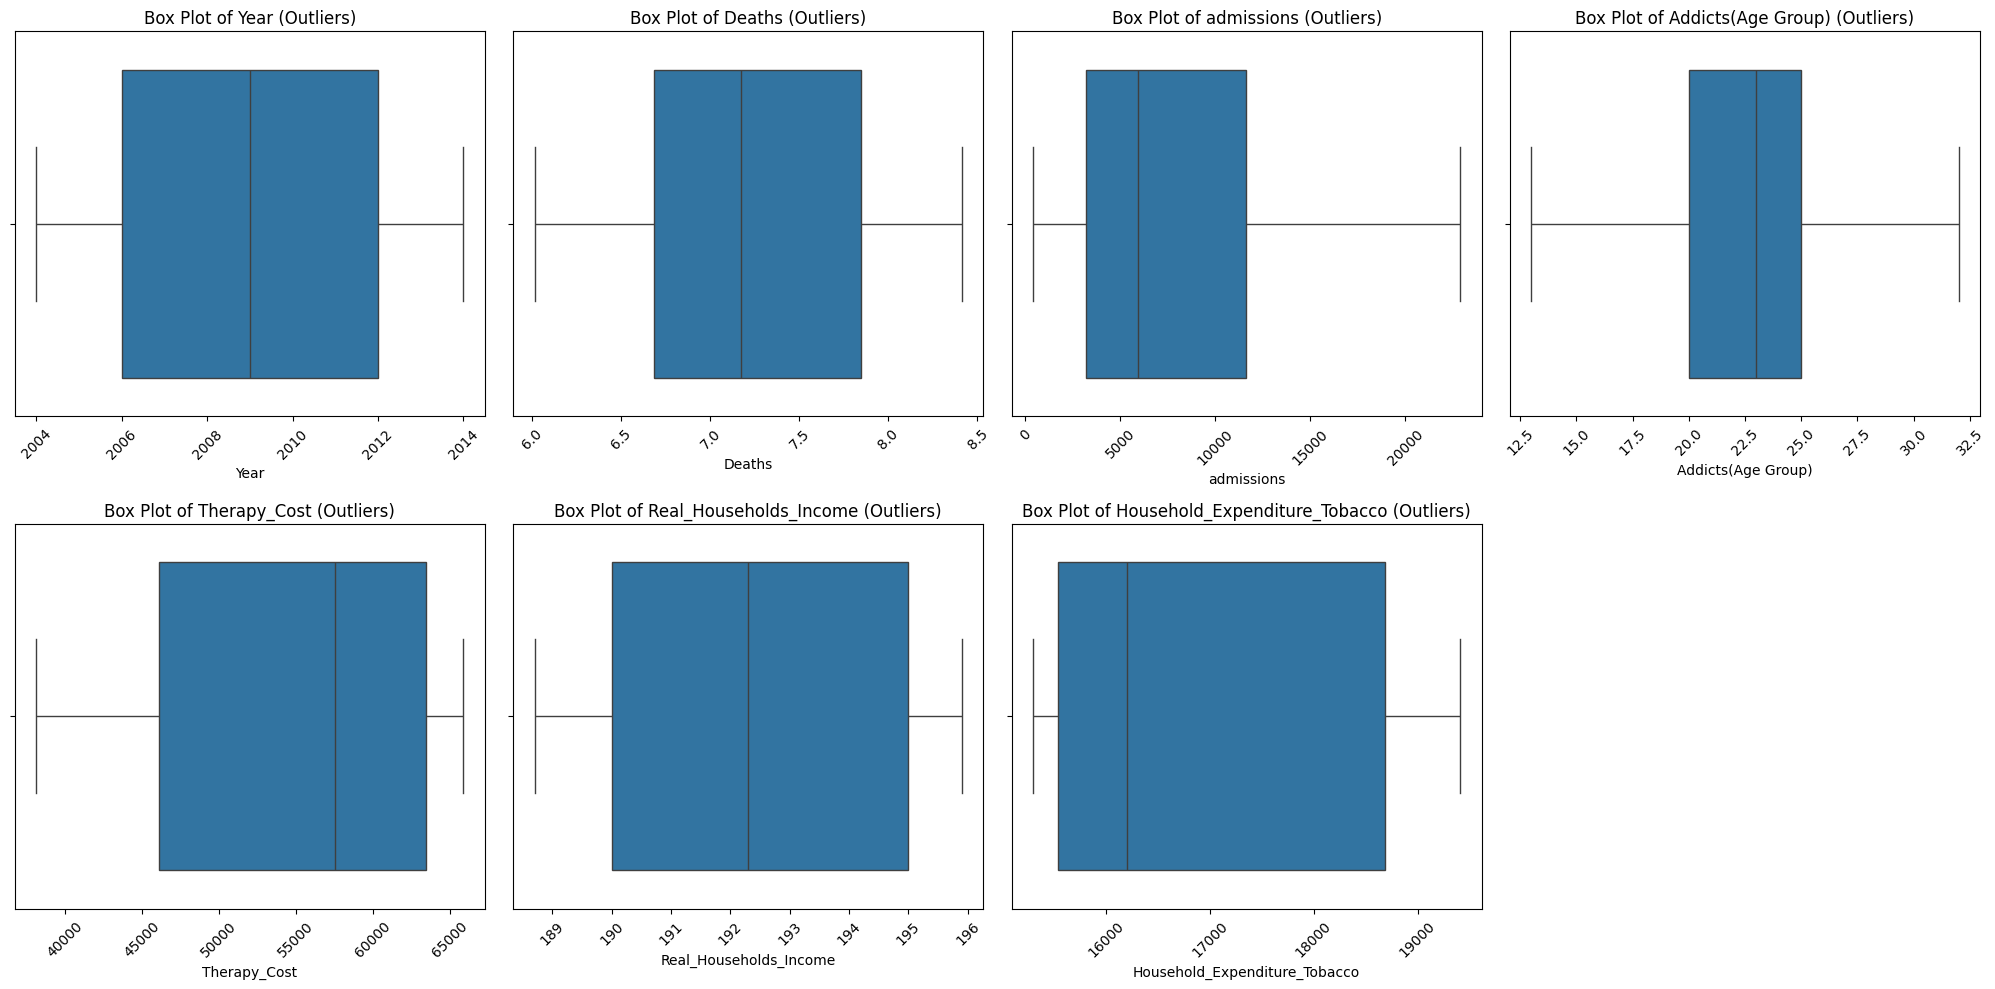

In [179]:

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Function to identify outliers using IQR
def identify_outliers_iqr(data, column):
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Function to identify outliers using Z-score
def identify_outliers_z_score(data, column, threshold=3):

    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    return data[z_scores > threshold]

# Function to identify outliers using Modified Z-score
def identify_outliers_modified_z_score(data, column, threshold=3.5):
   
    median = data[column].median()
    mad = np.median(np.abs(data[column] - median))  
    modified_z_scores = 0.6745 * (data[column] - median) / mad 
    return data[np.abs(modified_z_scores) > threshold]

outliers_dict = {}
for column in numerical_cols:
    outliers_iqr = identify_outliers_iqr(df, column)
    outliers_z_score = identify_outliers_z_score(df, column)
    outliers_modified_z_score = identify_outliers_modified_z_score(df, column)
    
   
    outliers_dict[column] = {
        'IQR': outliers_iqr,
        'Z-Score': outliers_z_score,
        'Modified Z-Score': outliers_modified_z_score
    }

num_cols = len(numerical_cols)

plots_per_row = 4 
num_rows = (num_cols + plots_per_row - 1) // plots_per_row  

fig, axes = plt.subplots(nrows=num_rows, ncols=plots_per_row, figsize=(plots_per_row * 5, num_rows * 5)) 


axes = axes.flatten()

for i, column in enumerate(numerical_cols):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Box Plot of {column} (Outliers)')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()


No outliers found,check completed

# *EDA Visualization*

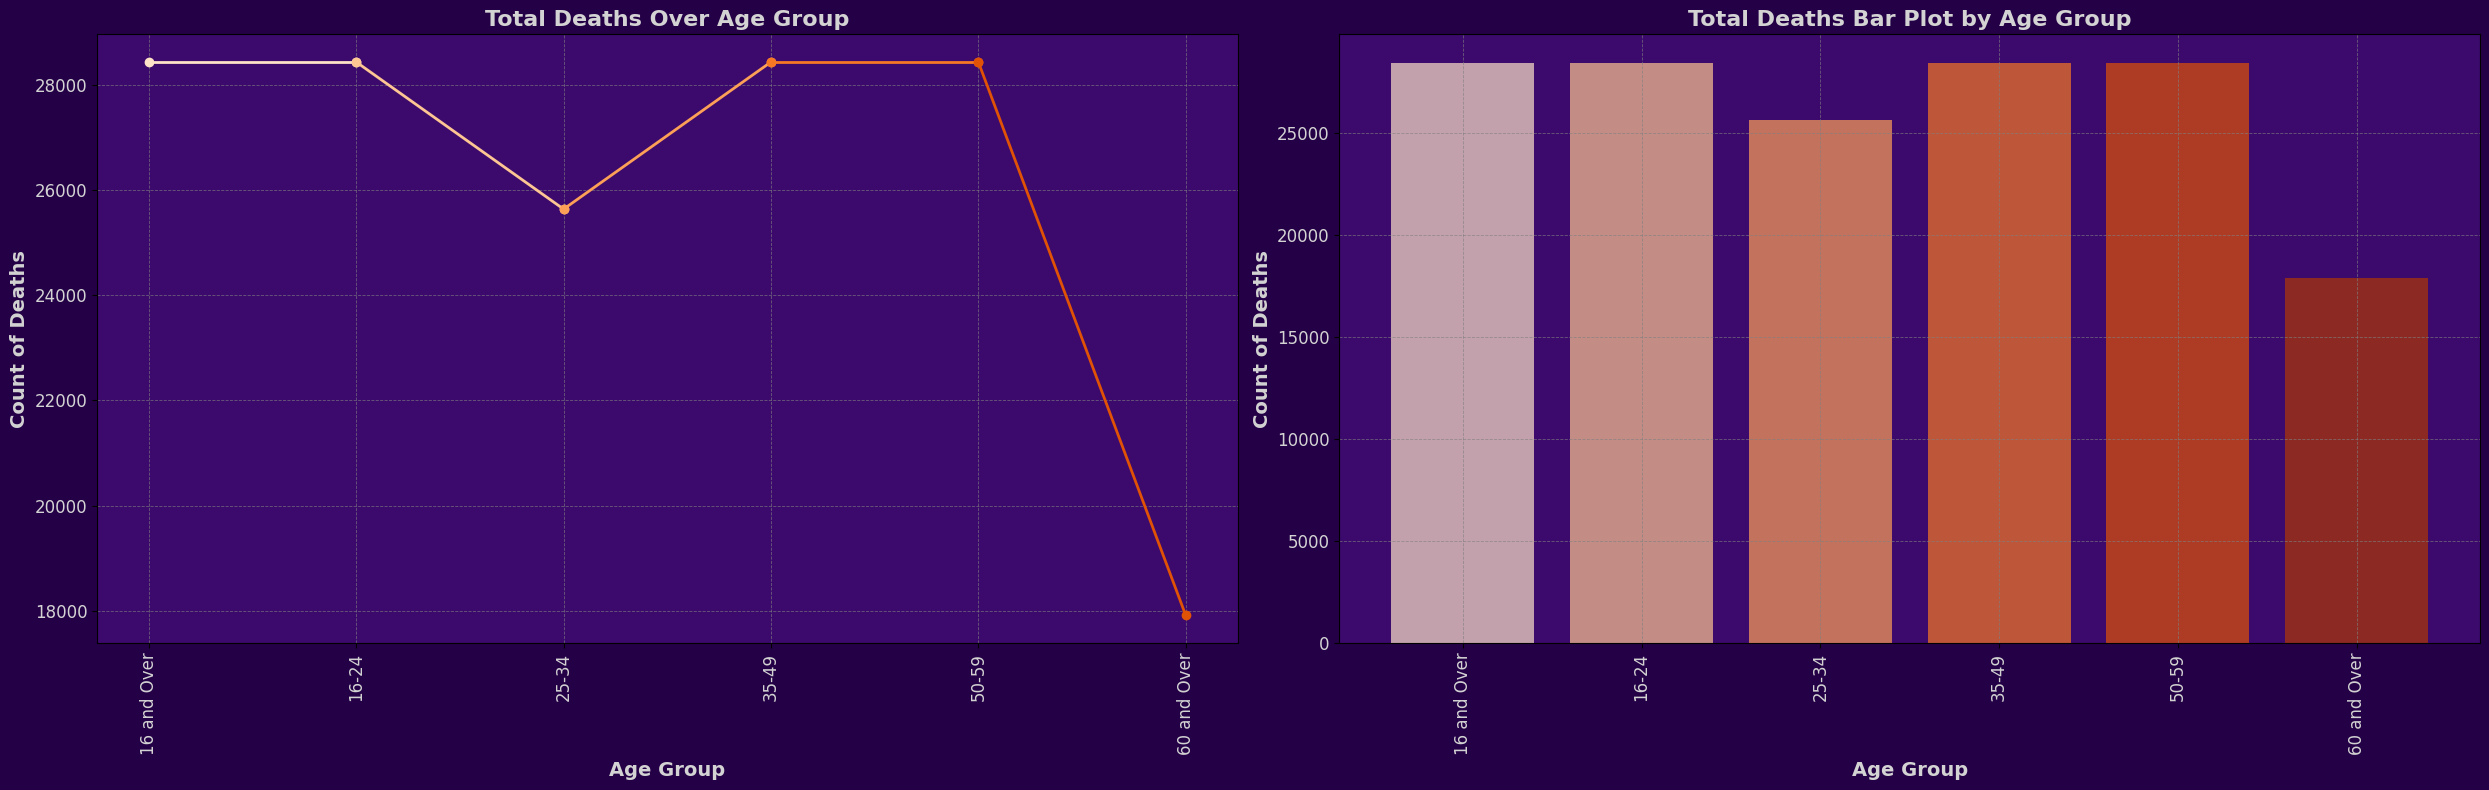

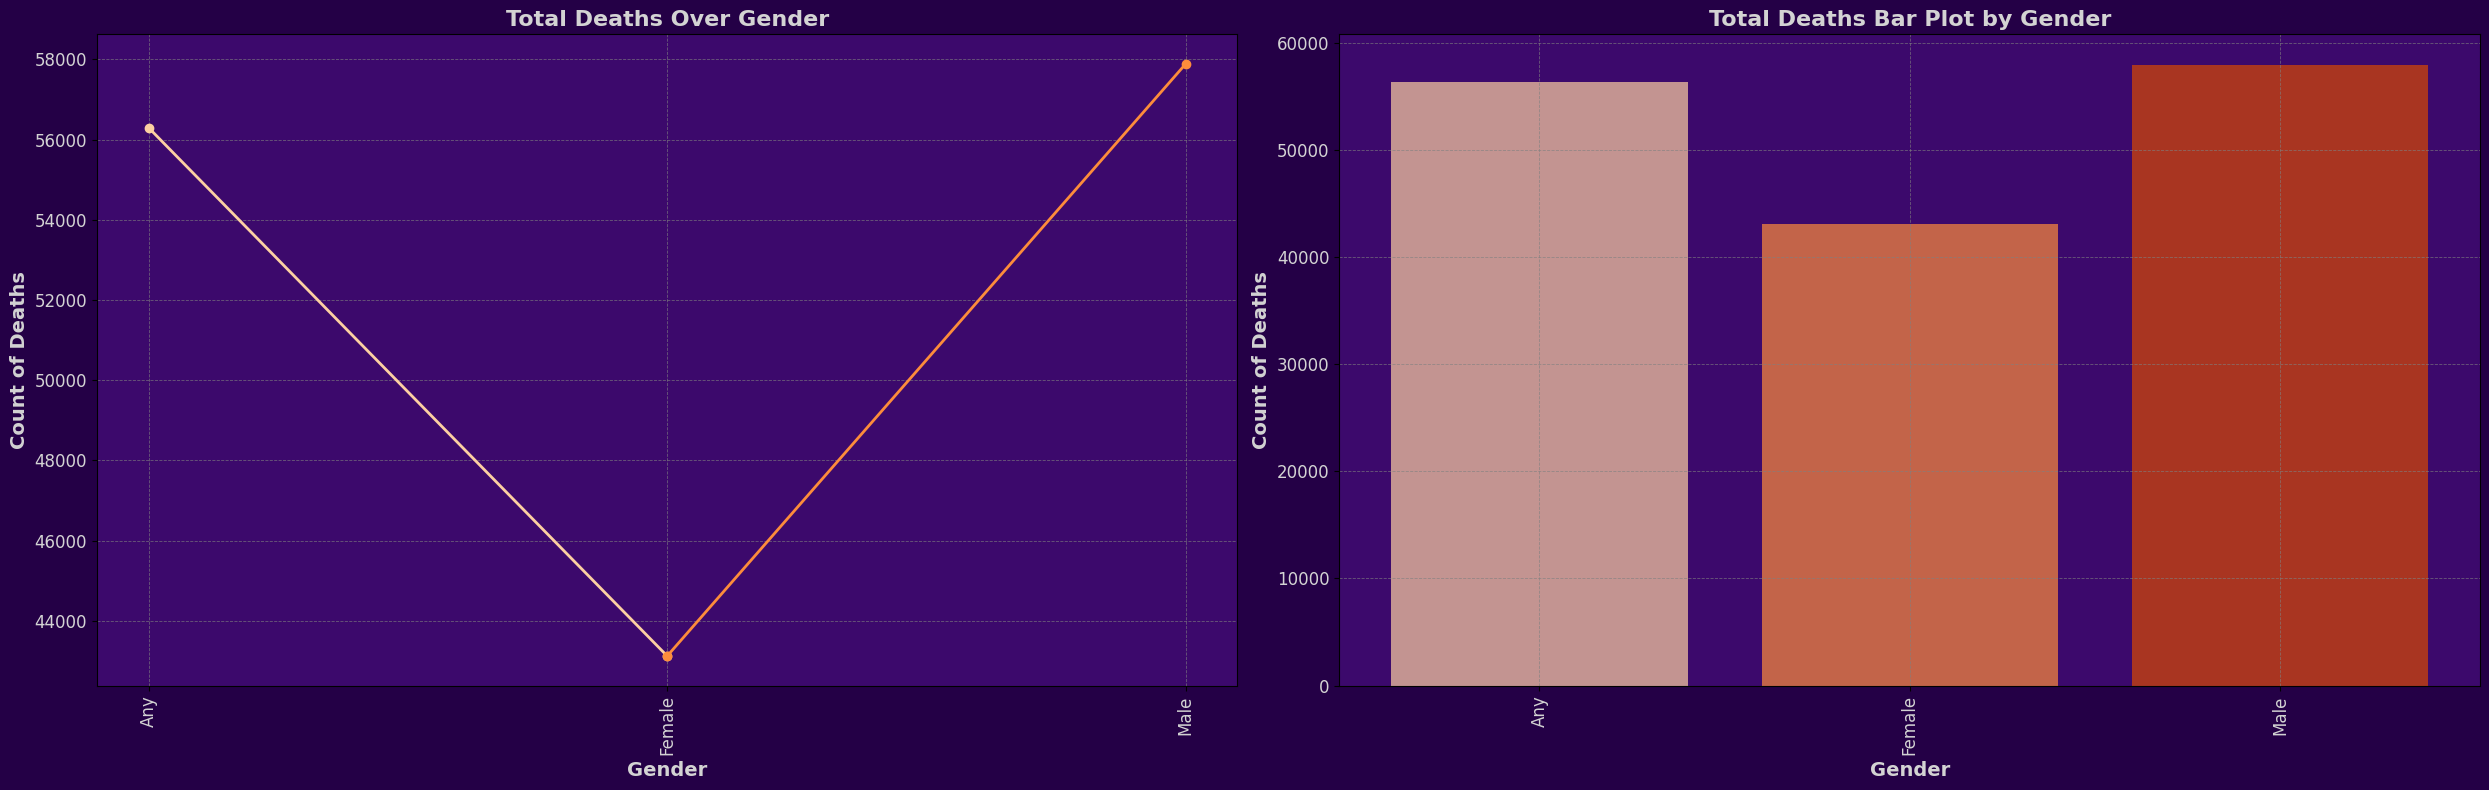

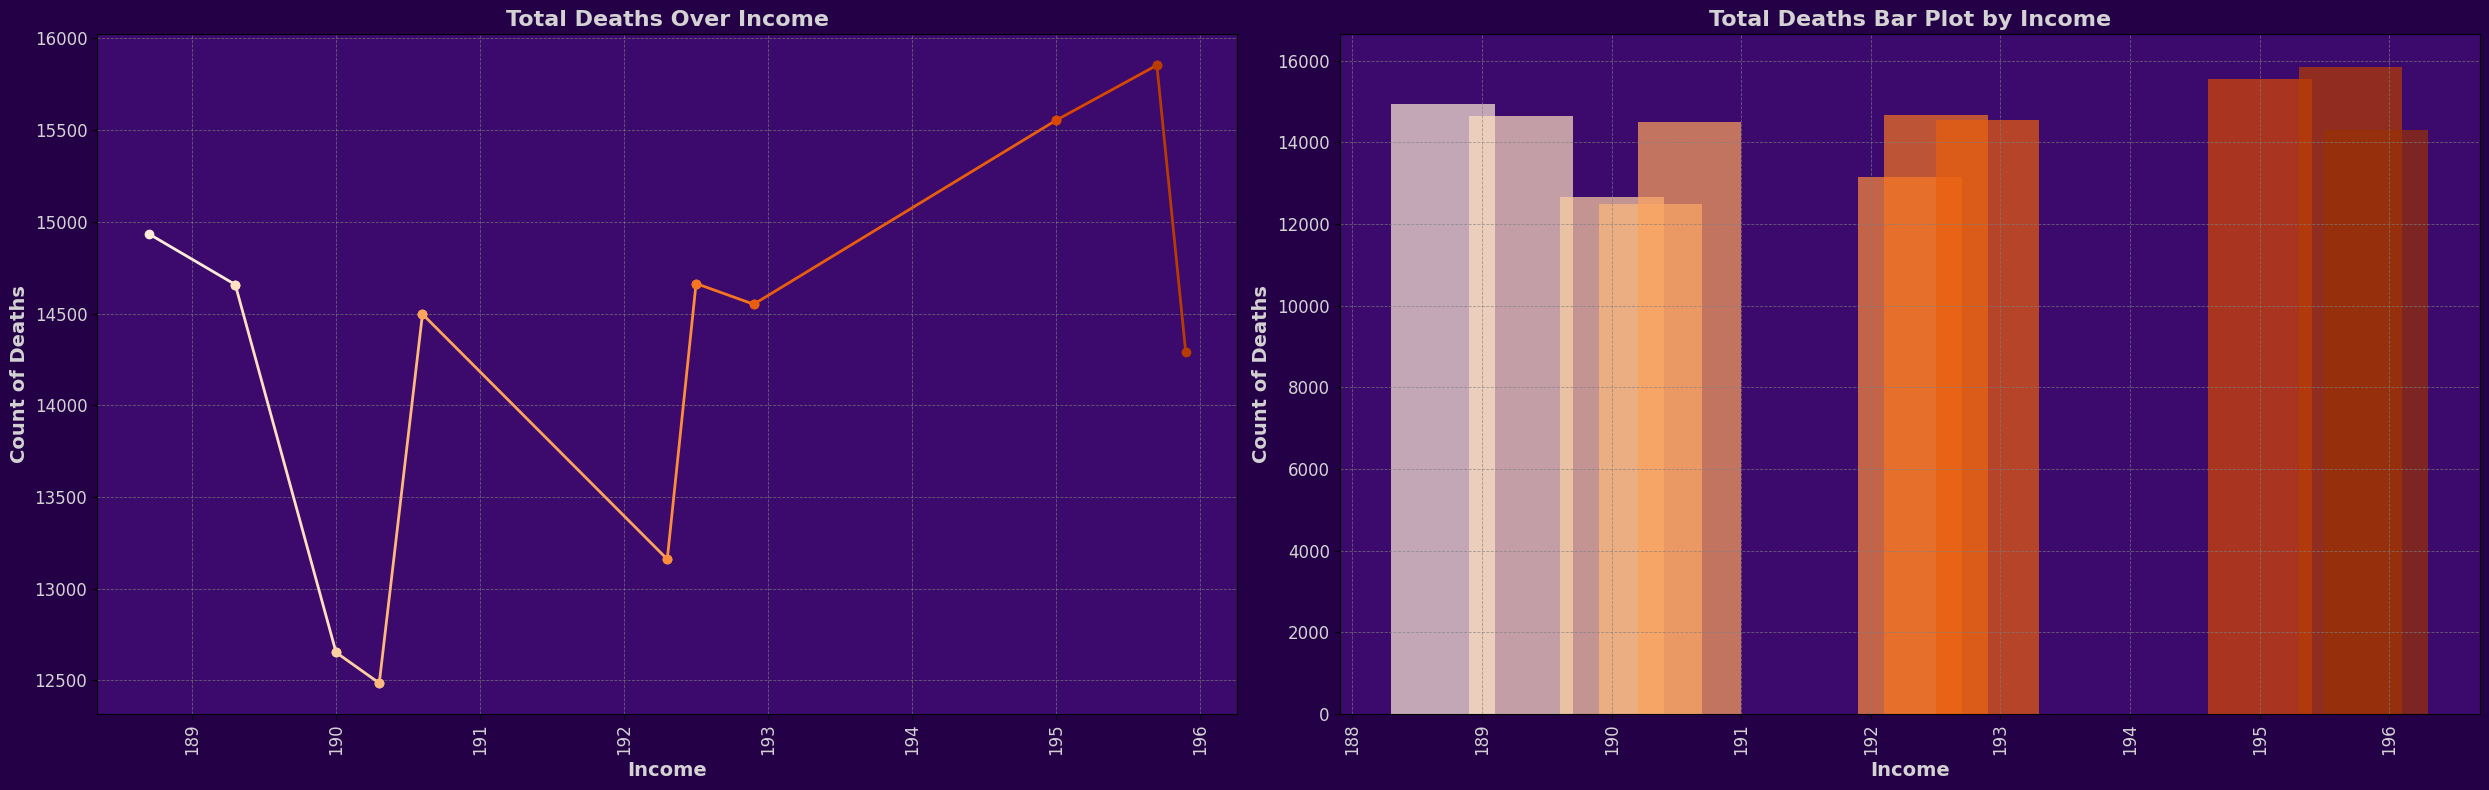

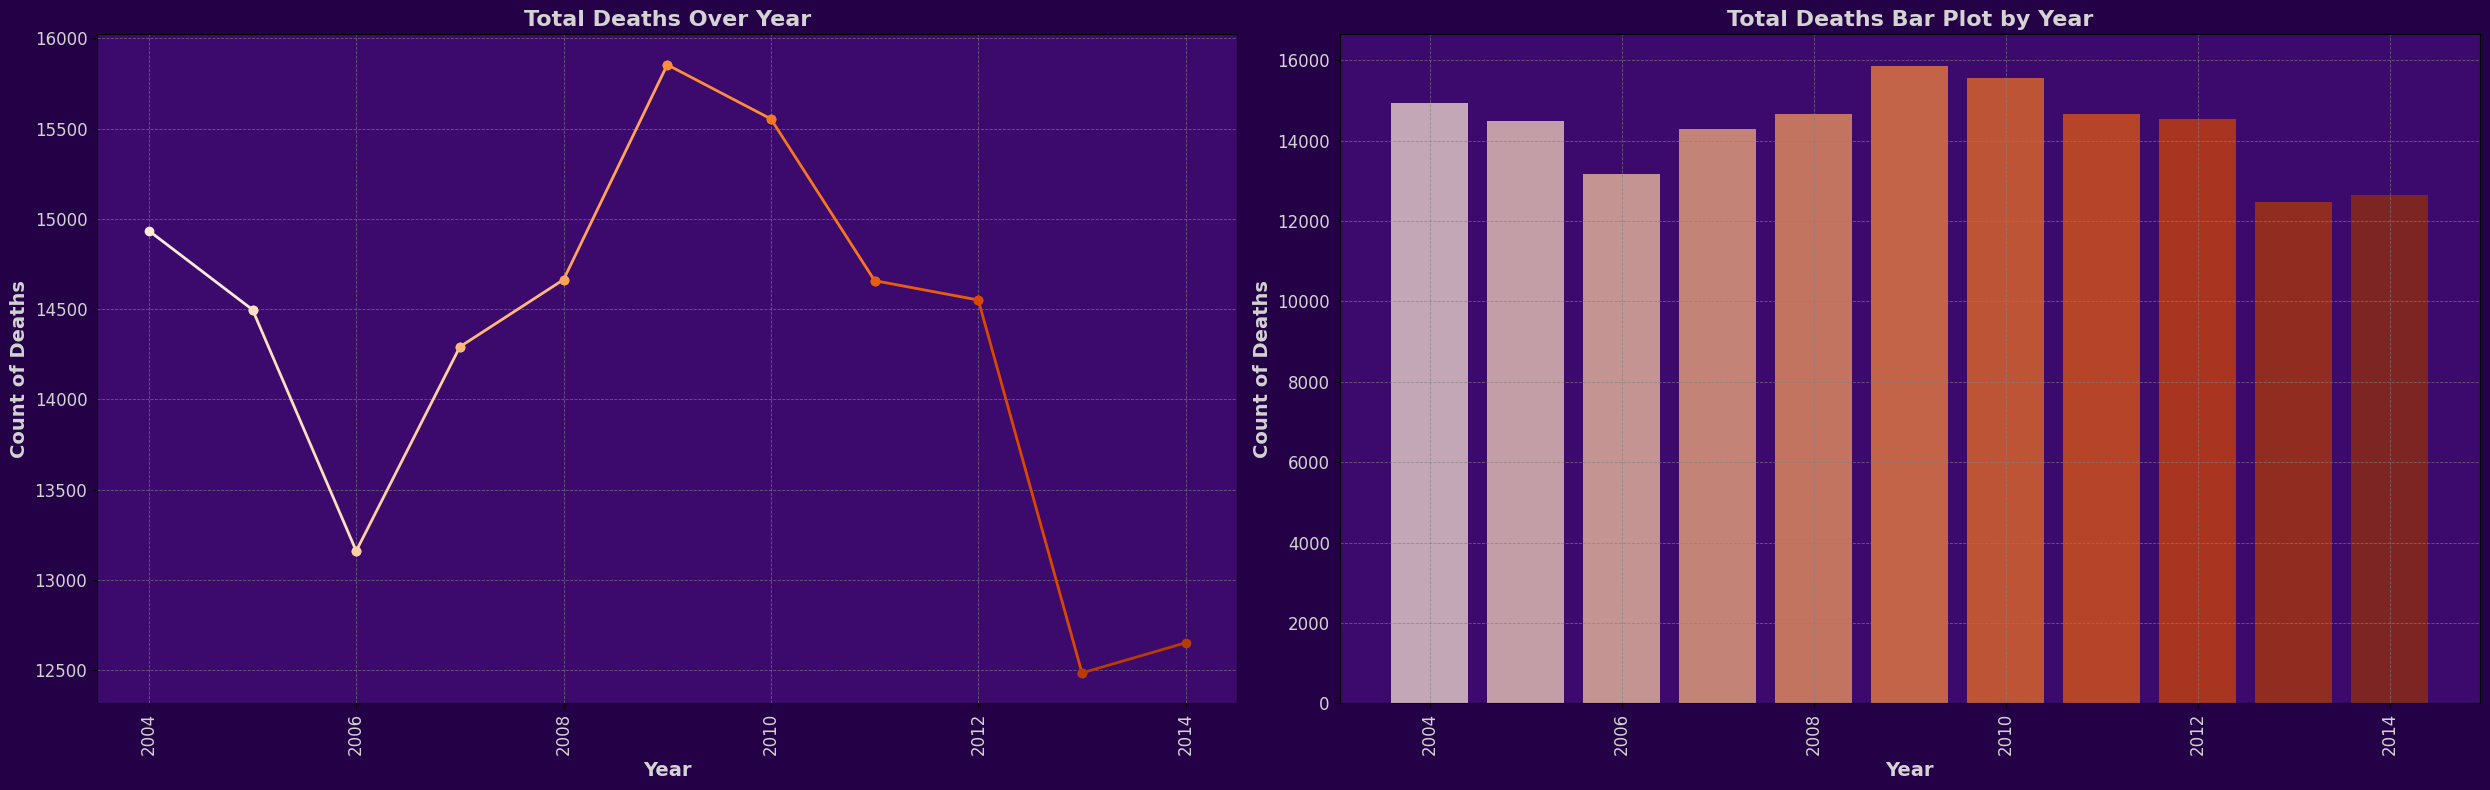

C:\Users\Shegin\AppData\Local\Temp\ipykernel_20916\1713086914.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


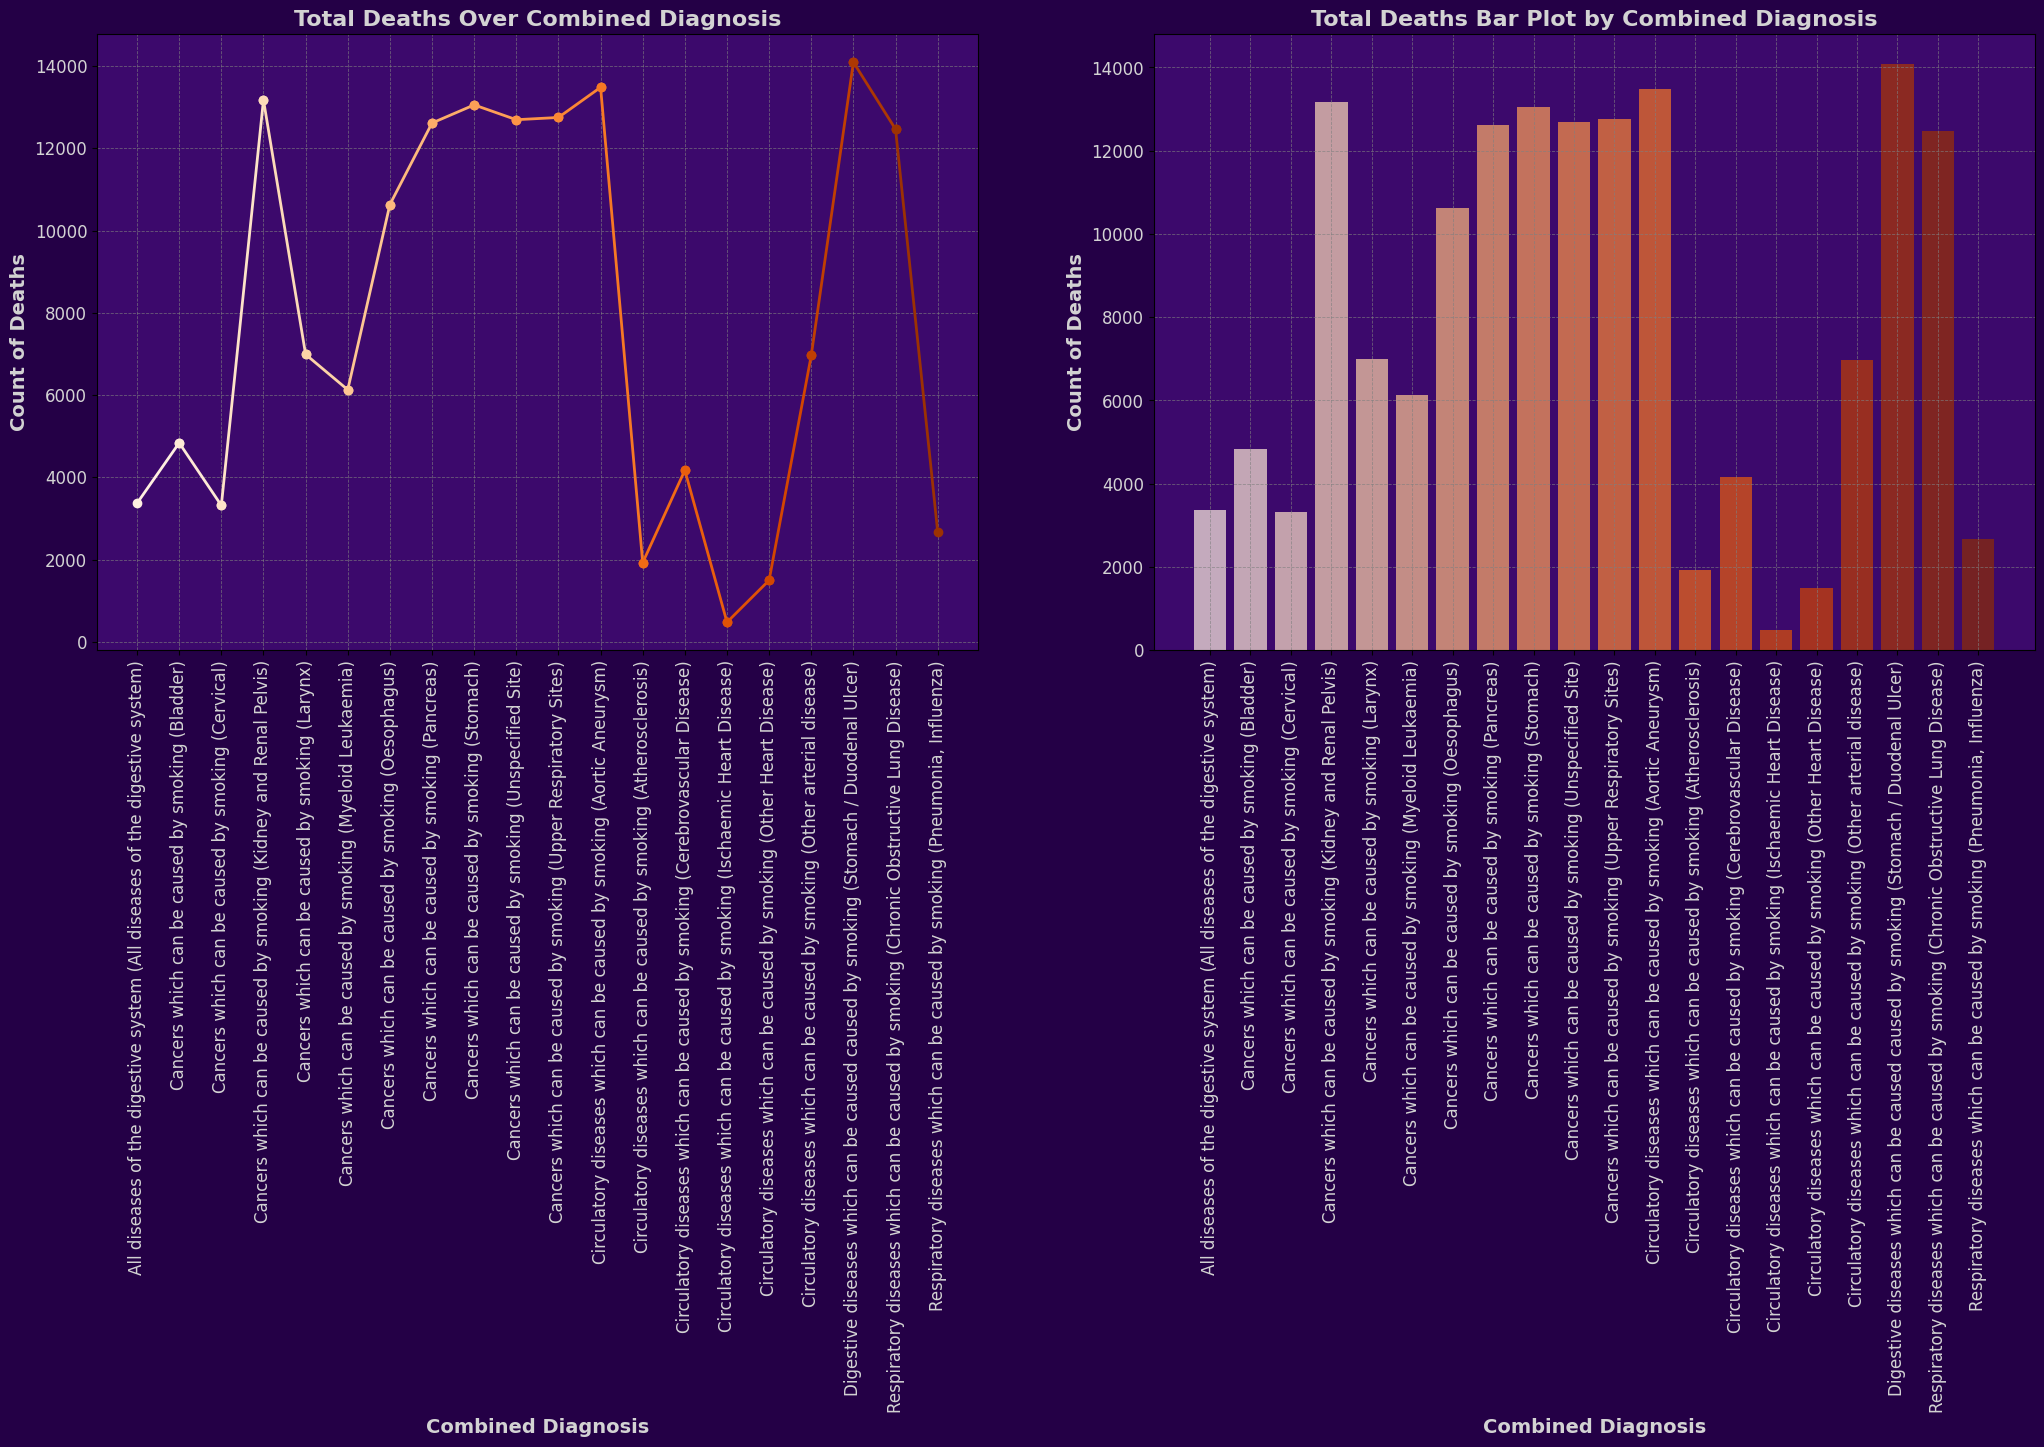

In [180]:



if 'Deaths' not in df.columns or 'Diagnosis Type' not in df.columns or 'ICD10 Diagnosis' not in df.columns:
    raise ValueError("The required columns are not present in the CSV file.")

df['Combined Diagnosis'] = df['Diagnosis Type'] + ' (' + df['ICD10 Diagnosis'] + ')'

label_mapping = {
    'Sex': 'Gender',
    'Real_Households_Income': 'Income',
}
def plot_deaths_by_category(df, category):
   
    label = label_mapping.get(category, category)  
    yearly_data = df.groupby(category).agg({'Deaths': 'sum'}).reset_index()
    plt.figure(figsize=(25, 8))
    plt.gcf().patch.set_facecolor('#240046')

   
    plt.subplot(1, 2, 1)
    colors = sns.color_palette("Oranges", len(yearly_data))

    for i in range(len(yearly_data) - 1):
        plt.plot(yearly_data[category].iloc[i:i+2], 
                 yearly_data['Deaths'].iloc[i:i+2], 
                 marker='o', color=colors[i], linewidth=2)

    plt.title(f'Total Deaths Over {label}', fontsize=16, fontweight='bold', color='lightgray')
    plt.xlabel(label, fontsize=14, fontweight='bold', color='lightgray')  # Changed label
    plt.ylabel('Count of Deaths', fontsize=14, fontweight='bold', color='lightgray')
    plt.gca().patch.set_facecolor('#3C096C')
    plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.7)
    plt.xticks(rotation=90, fontsize=12, color='lightgray')
    plt.yticks(fontsize=12, color='lightgray')

    plt.subplot(1, 2, 2)
    bars = plt.bar(yearly_data[category], yearly_data['Deaths'], color=colors, alpha=0.7)

    plt.title(f'Total Deaths Bar Plot by {label}', fontsize=16, fontweight='bold', color='lightgray')
    plt.xlabel(label, fontsize=14, fontweight='bold', color='lightgray')  # Changed label
    plt.ylabel('Count of Deaths', fontsize=14, fontweight='bold', color='lightgray')
    plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.7)
    plt.gca().patch.set_facecolor('#3C096C')
    plt.xticks(rotation=90, fontsize=12, color='lightgray')
    plt.yticks(fontsize=12, color='lightgray')
    plt.tight_layout()

    plt.show()

categories = ['Age Group', 'Sex', 'Real_Households_Income', 'Year', 'Combined Diagnosis']

for category in categories:
    plot_deaths_by_category(df, category)


### Insights
The death rate is high for the age group from 16-24 ,34-59,decreases after 59 <br>
Males accounts for the largest death share as opposed to females <br>
Death rate is lower for the middle-lower class income(190) ,surges high upto 195 and then decreases <br>
The Death rates over years have spiked upto 2010,with an intermediate dip in 2006 however the deaths has decreased from the year after 2010<br>
Stomach ulcer has the highest death rate followed by Aortic aneurysm and Pelvis cancers
### Inference
The Death rate is high for teenage to adult phase however decreases over the increase of age,this is such a contradicting picture however the possible reasons might be  that old aged people are not much exposed to tobacco variants as opposed to youth,become more health conscious over old age or due to their dependency over family.The females have low death count toll as opposed to men . The Death count with respect to income shows that,there is a steady increase for death after certain increase in income value(192), this shows that the high income earning people are more susceptible to deaths from tobacco,due to high buying capacity ,however for the greatest income value of 196,the mortality rate is really low which also suggests that the ultra-aristrocrats have better life expectancy probably due to treatments or life-style.The total death rate over years shows a positive outcome of less mortality over years due to tobacco.The Deaths due to cancers which is caused by smoking is found to be the highest.

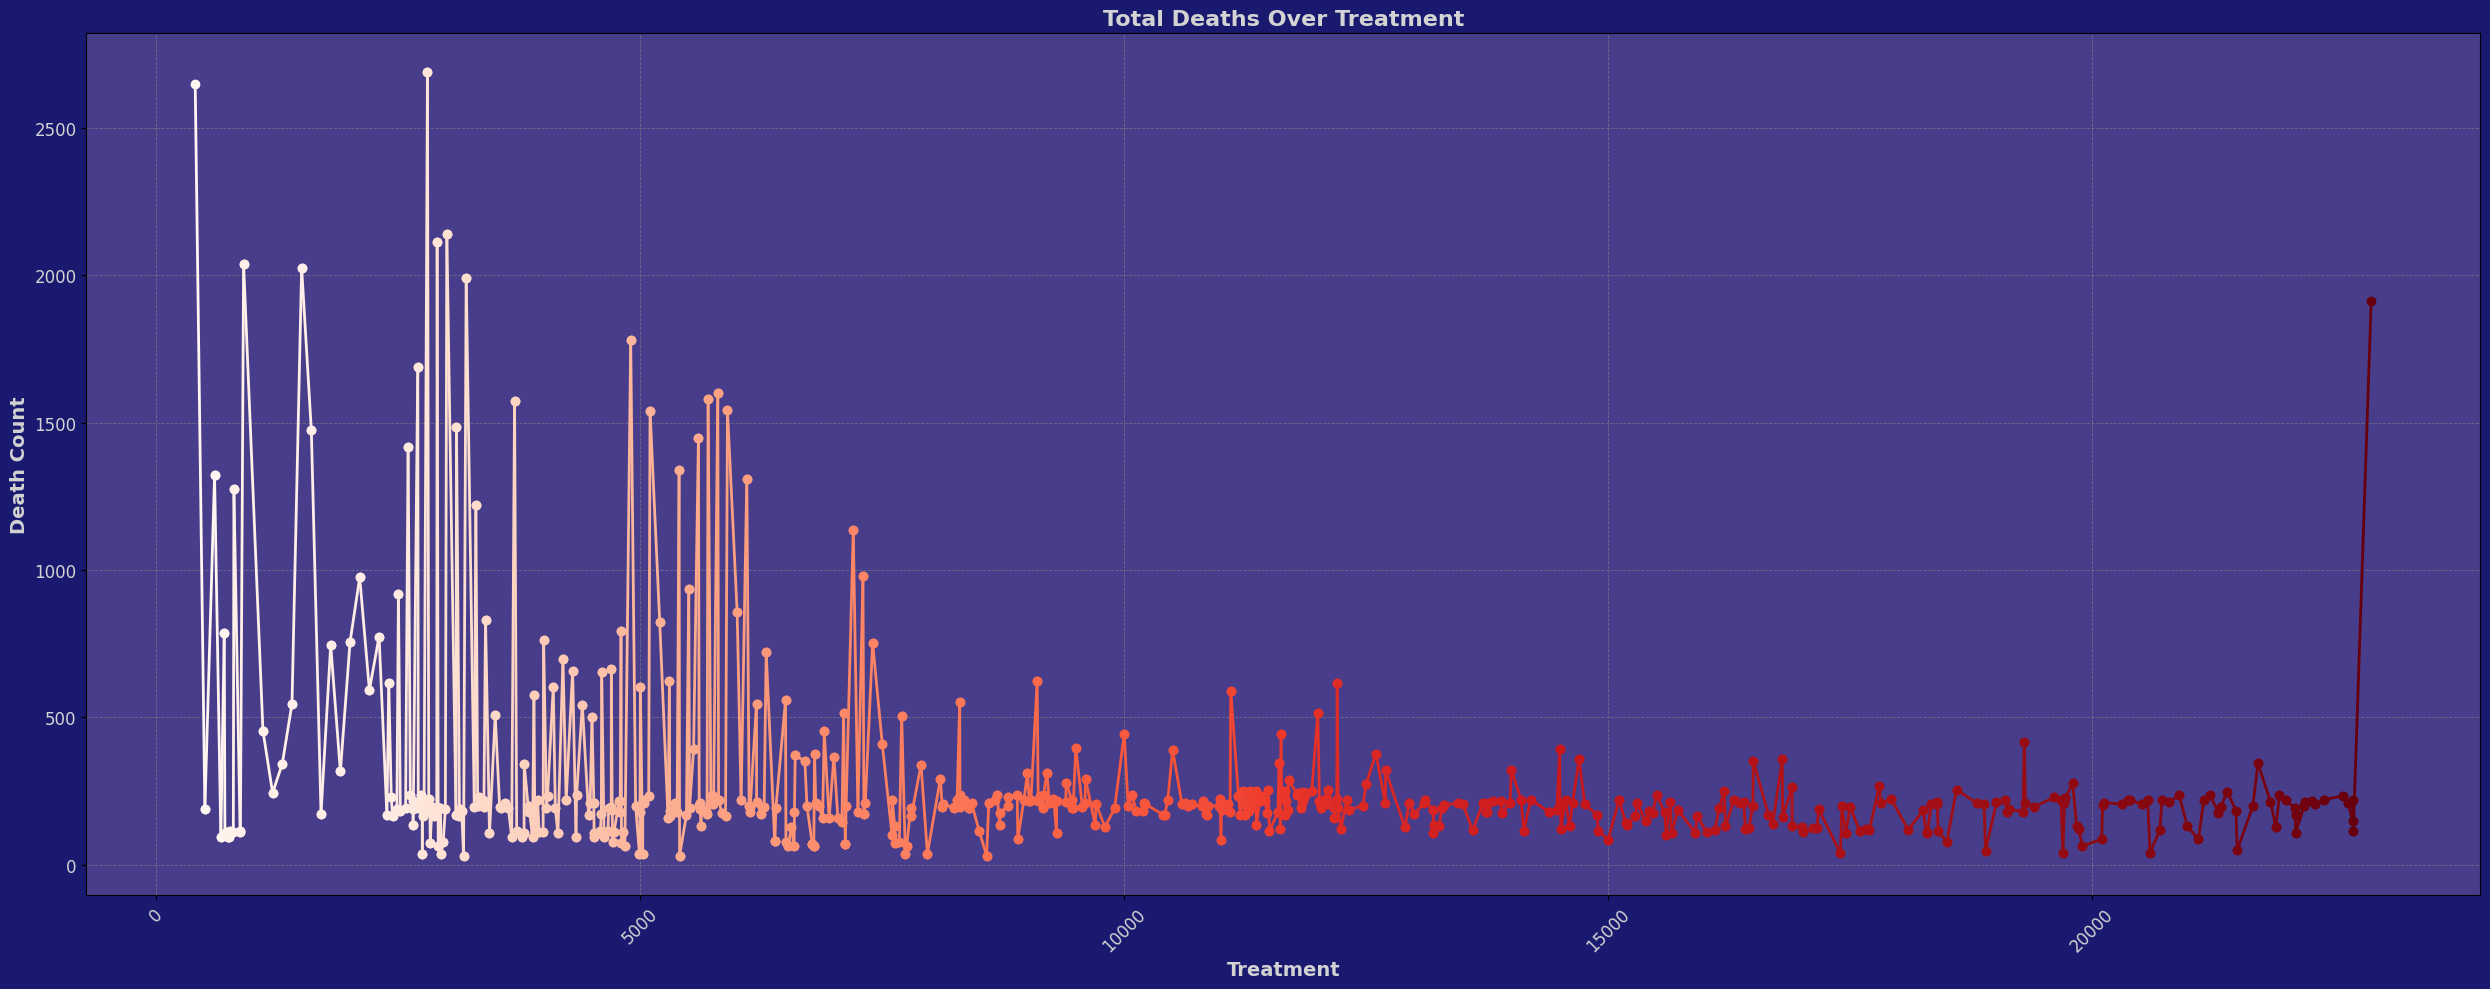

In [181]:

yearly_data = df.groupby('admissions').agg({
    'Deaths': 'sum'
}).reset_index()


plt.figure(figsize=(25, 10))

plt.gcf().patch.set_facecolor('midnightblue')  

norm = plt.Normalize(yearly_data['Deaths'].min(), yearly_data['Deaths'].max())
colors = sns.color_palette("Reds", len(yearly_data))


for i in range(len(yearly_data) - 1):
    plt.plot(yearly_data['admissions'].iloc[i:i+2], 
             yearly_data['Deaths'].iloc[i:i+2], 
             marker='o', color=colors[i], linewidth=2)

plt.title('Total Deaths Over Treatment', fontsize=16, fontweight='bold', color='lightgray')
plt.xlabel('Treatment', fontsize=14, fontweight='bold', color='lightgray')
plt.ylabel('Death Count', fontsize=14, fontweight='bold', color='lightgray')


plt.xticks(rotation=45, fontsize=12, color='lightgray')
plt.yticks(fontsize=12, color='lightgray')


plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.7)
plt.gca().set_facecolor('darkslateblue')

plt.tight_layout()
plt.show()


The Health Treatment rate with respect to Death tolls show that there is low death rates for increased number of well-treated people

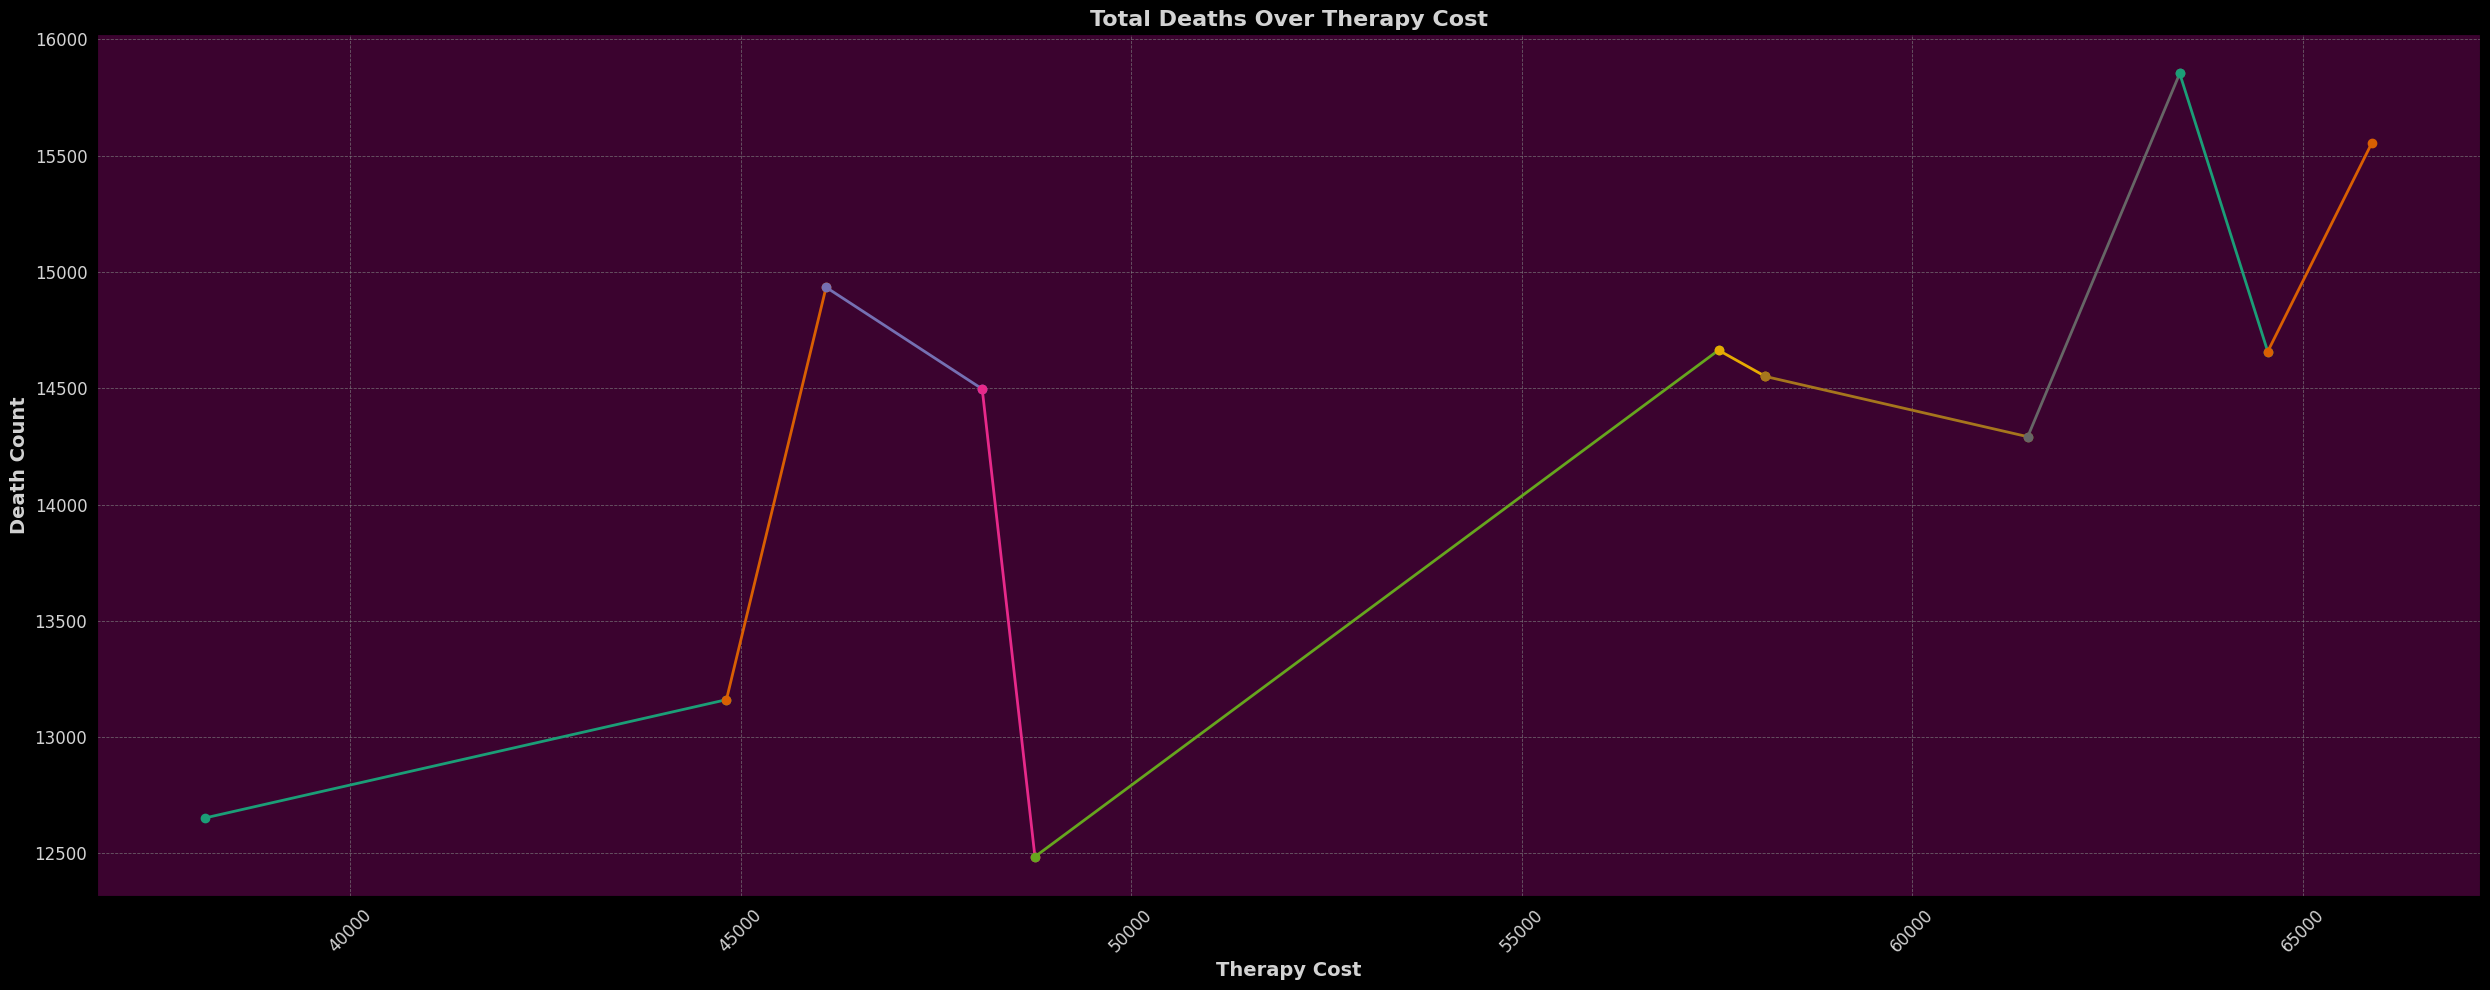

In [182]:

yearly_data = df.groupby('Therapy_Cost').agg({
    'Deaths': 'sum'
}).reset_index()


plt.figure(figsize=(25, 10))


plt.gcf().patch.set_facecolor('black')  

norm = plt.Normalize(yearly_data['Deaths'].min(), yearly_data['Deaths'].max())
colors = sns.color_palette("Dark2", len(yearly_data))

for i in range(len(yearly_data) - 1):
    plt.plot(yearly_data['Therapy_Cost'].iloc[i:i+2], 
             yearly_data['Deaths'].iloc[i:i+2], 
             marker='o', color=colors[i], linewidth=2)

plt.title('Total Deaths Over Therapy Cost', fontsize=16, fontweight='bold', color='lightgray')
plt.xlabel('Therapy Cost', fontsize=14, fontweight='bold', color='lightgray')
plt.ylabel('Death Count', fontsize=14, fontweight='bold', color='lightgray')

plt.xticks(rotation=45, fontsize=12, color='lightgray')
plt.yticks(fontsize=12, color='lightgray')

plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.7)
plt.gca().set_facecolor('#3B032F')

plt.tight_layout()
plt.show()




The Therapy Cost with respective to Death count shows an inverse relationships,this might indicate beyond certain tobacco toxicity effect over body,there might be no cure no matter how expensive the treatment or medicine might be.

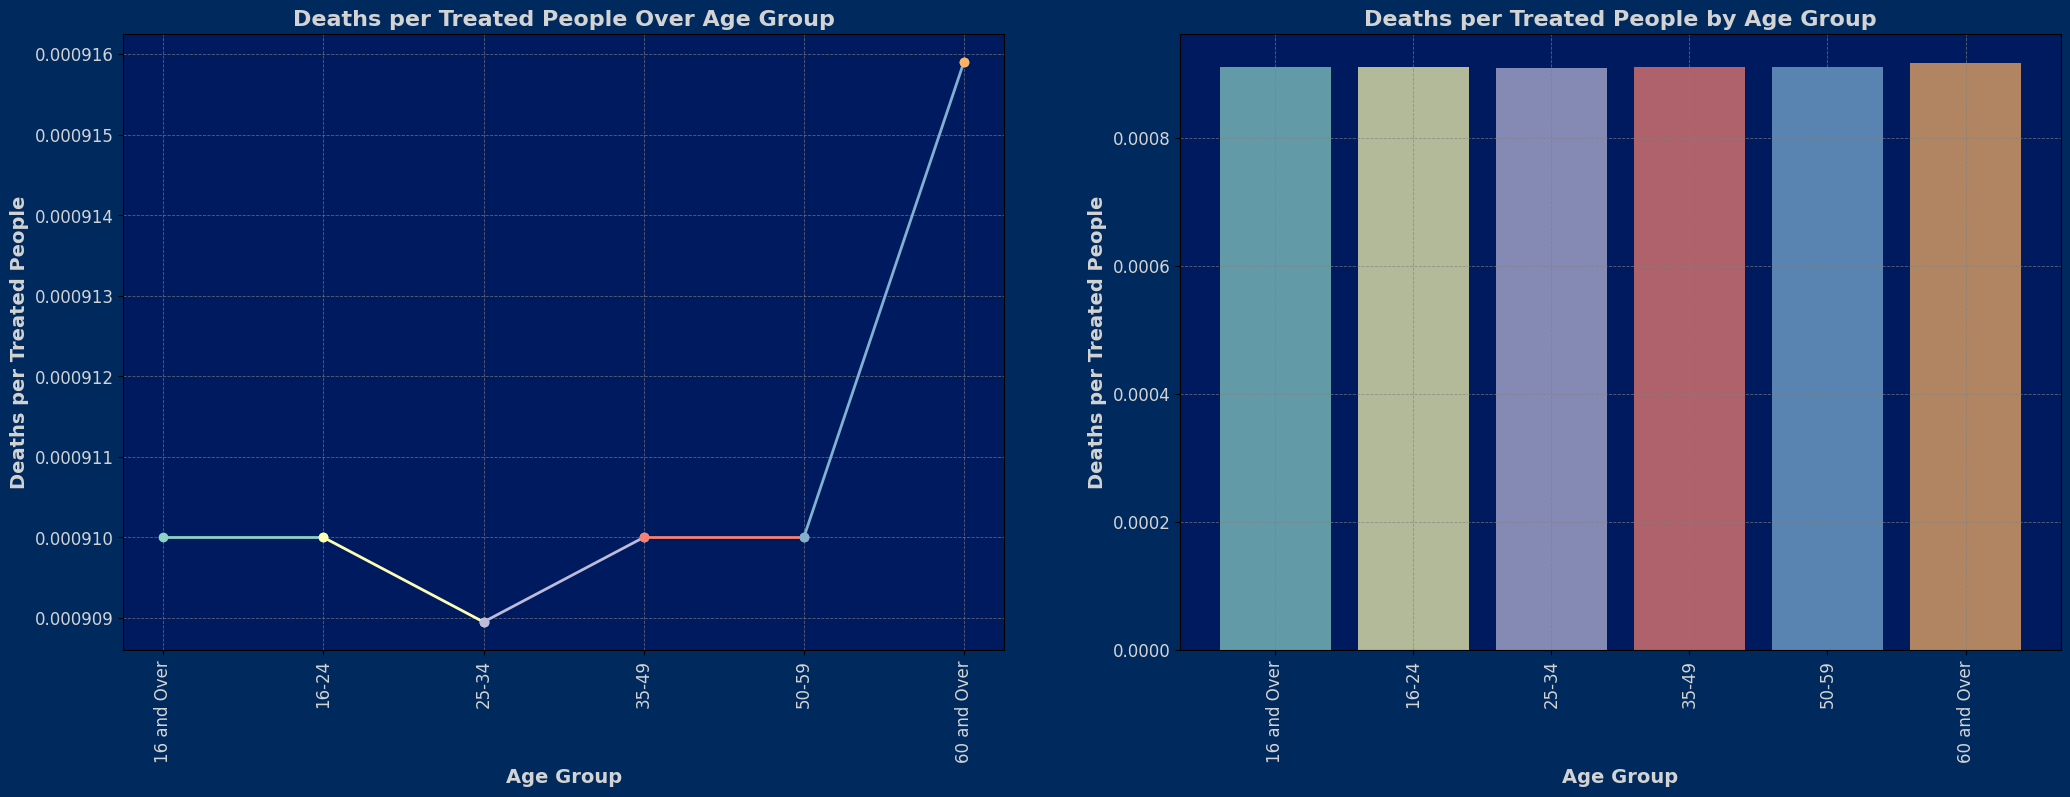

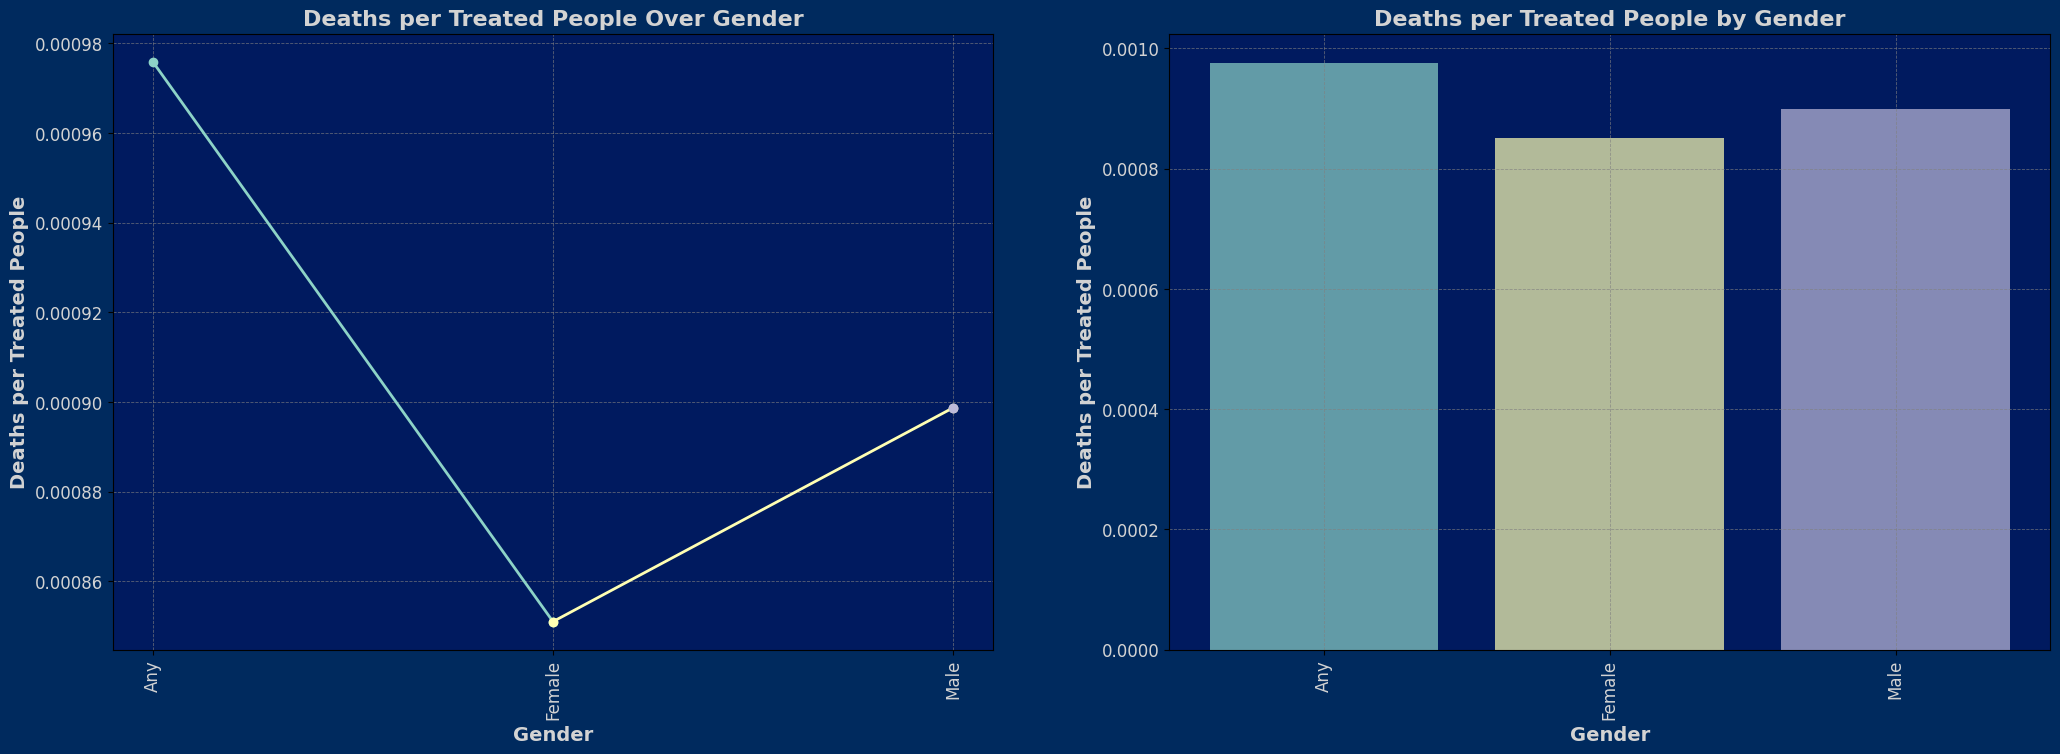

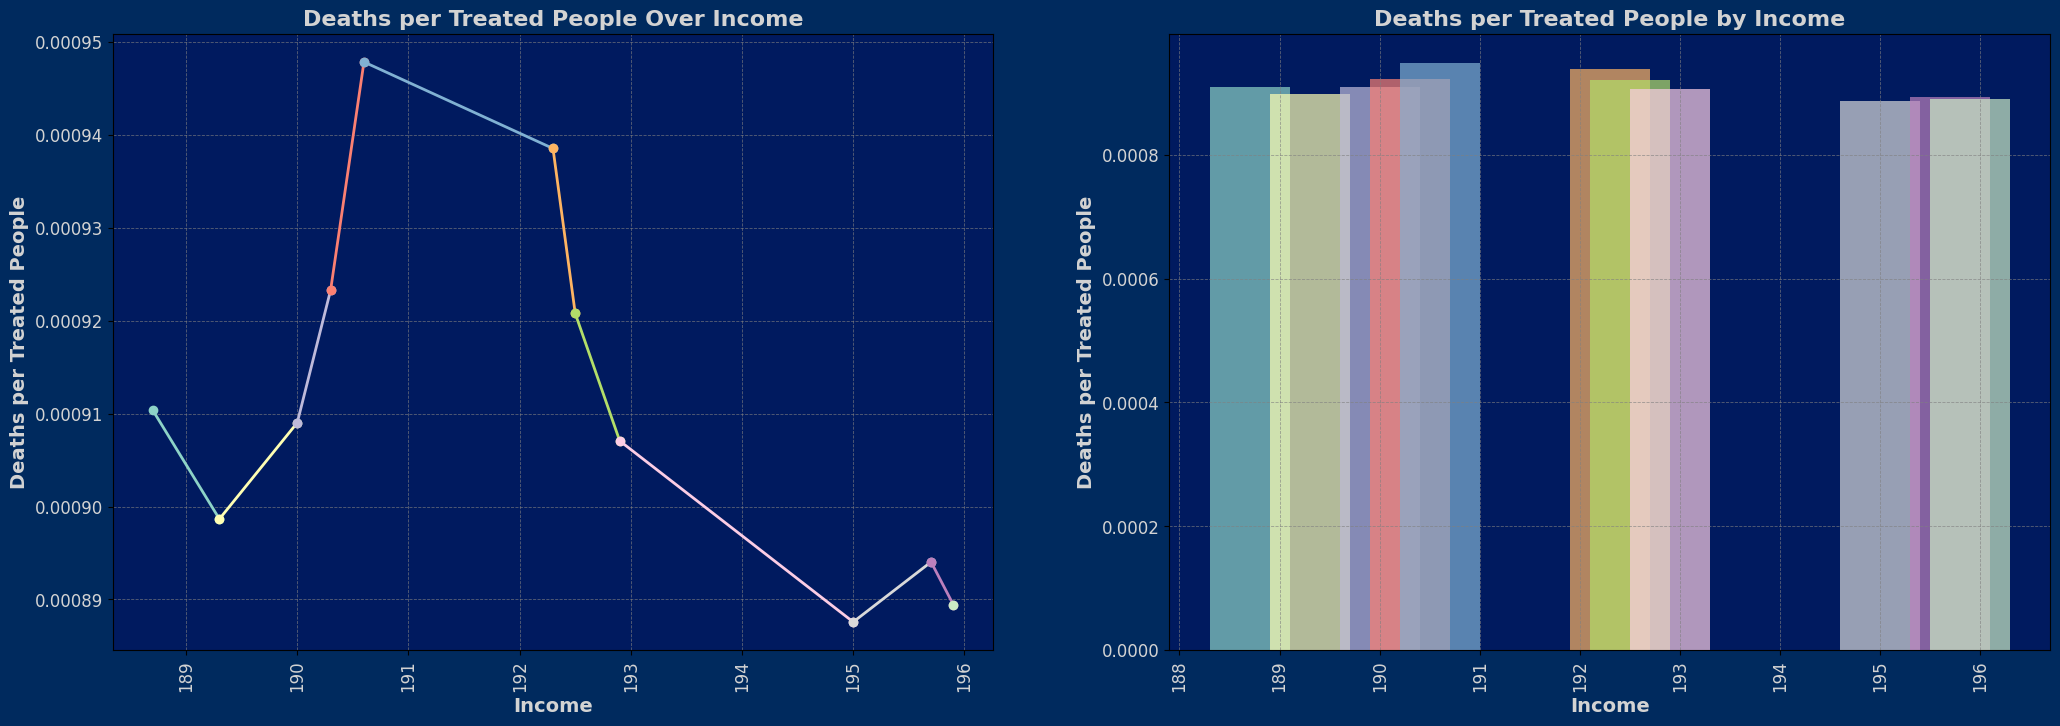

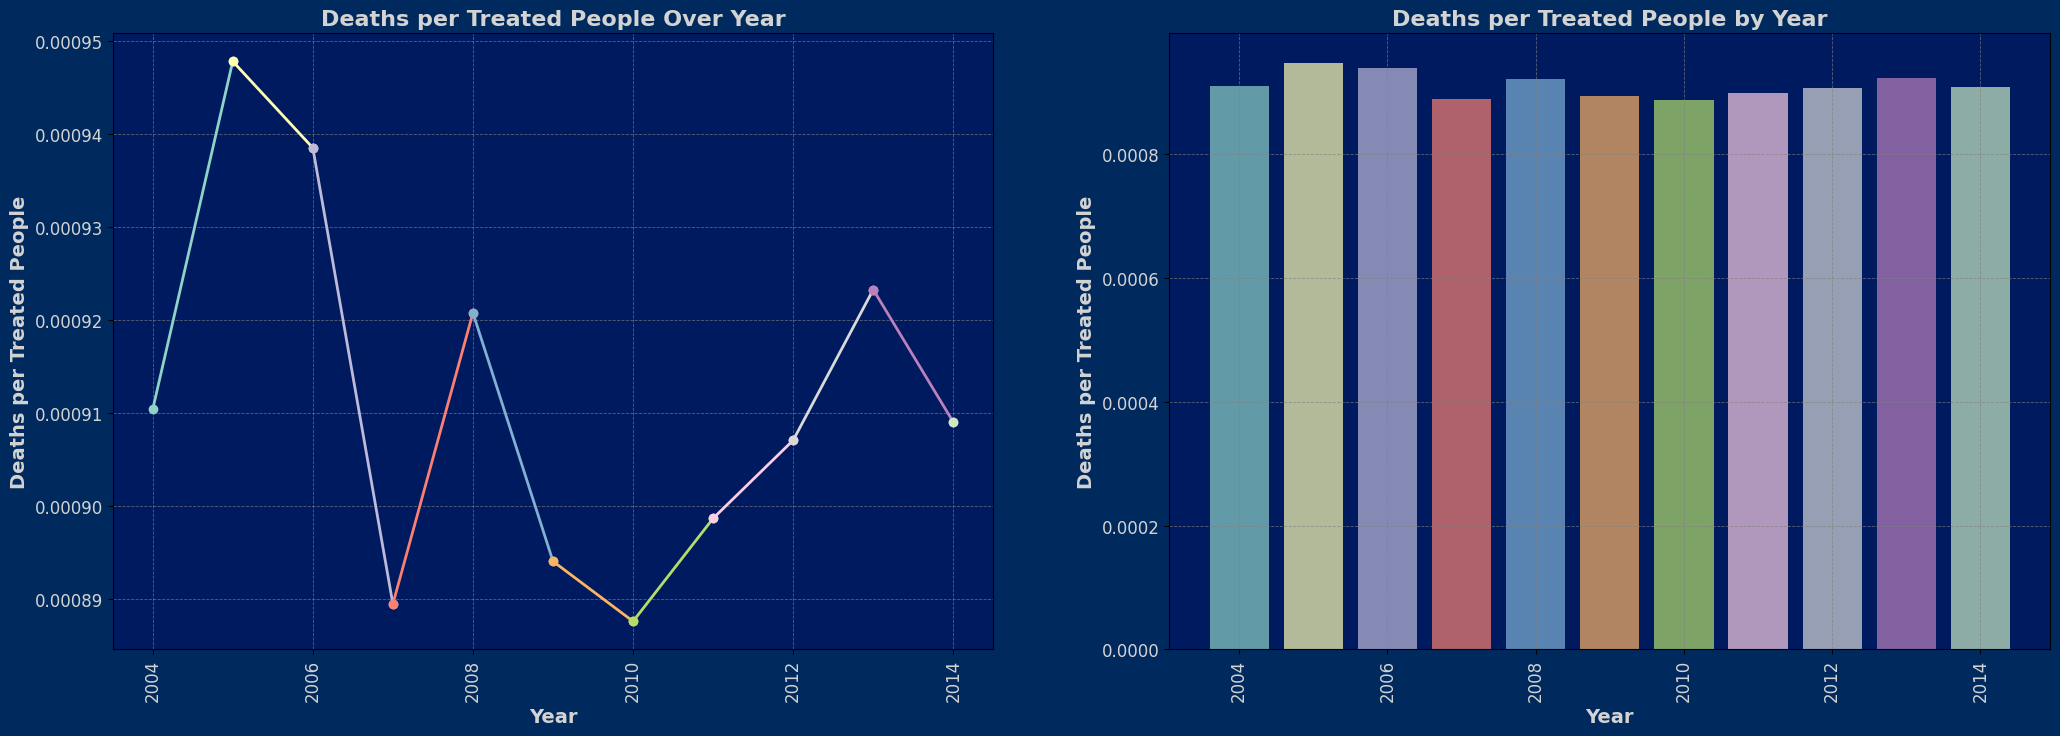

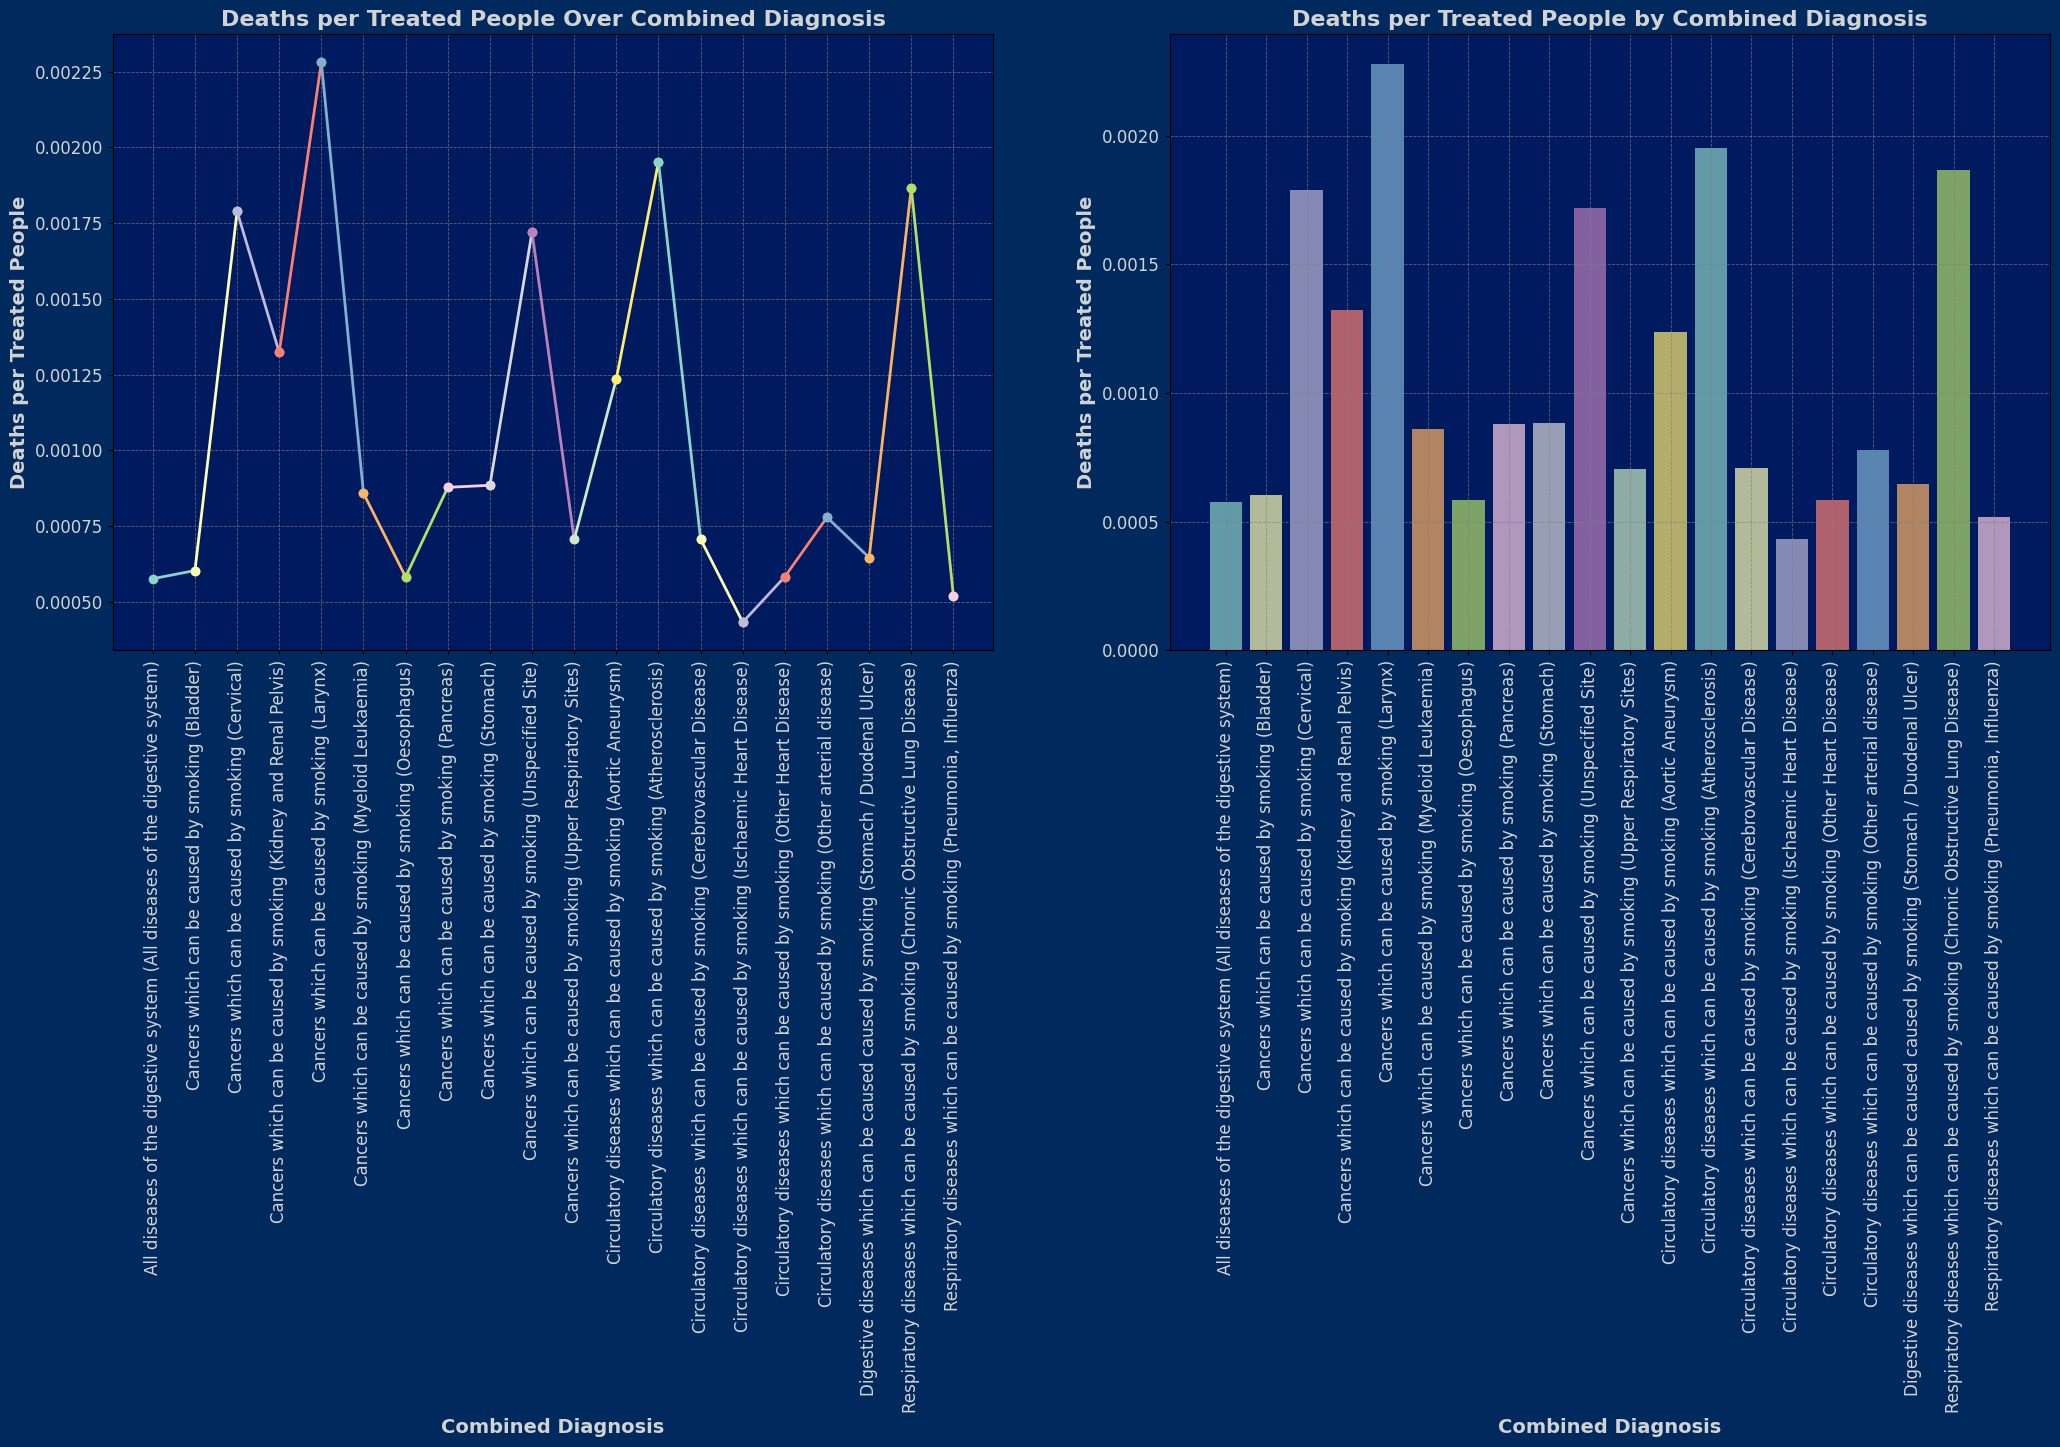

<Figure size 640x480 with 0 Axes>

In [183]:
if 'Deaths' not in df.columns or 'admissions' not in df.columns or 'Diagnosis Type' not in df.columns or 'ICD10 Diagnosis' not in df.columns:
    raise ValueError("The required columns are not present in the CSV file.")

df['Combined Diagnosis'] = df['Diagnosis Type'] + ' (' + df['ICD10 Diagnosis'] + ')'

label_mapping = {
    'Sex': 'Gender',
    'Real_Households_Income': 'Income',
}

def plot_deaths_per_admissions_by_category(df, category):
    label = label_mapping.get(category, category)
    yearly_data = df.groupby(category).agg({'Deaths': 'sum', 'admissions': 'sum'}).reset_index()

    yearly_data['Deaths per Treated People'] = yearly_data['Deaths'] / yearly_data['admissions']

    plt.figure(figsize=(25, 8))
    plt.gcf().patch.set_facecolor('#002a5e')

    # Use all colors from the seaborn 'Set2' palette
    colors = sns.color_palette("Set3", len(yearly_data))

    # Line plot for Deaths per Admission ratio
    plt.subplot(1, 2, 1)
    for i in range(len(yearly_data)):
        plt.plot(yearly_data[category].iloc[i:i+2], 
                 yearly_data['Deaths per Treated People'].iloc[i:i+2], 
                 marker='o', color=colors[i], linewidth=2, label=f'Deaths per Treated People - {yearly_data[category].iloc[i]}')
    
    plt.title(f'Deaths per Treated People Over {label}', fontsize=16, fontweight='bold', color='lightgray')
    plt.xlabel(label, fontsize=14, fontweight='bold', color='lightgray')
    plt.ylabel('Deaths per Treated People', fontsize=14, fontweight='bold', color='lightgray')
    plt.gca().patch.set_facecolor('#001a5f')
    plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.7)
    plt.xticks(rotation=90, fontsize=12, color='lightgray')
    plt.yticks(fontsize=12, color='lightgray')
  

    # Bar plot for Deaths per Admission ratio
    plt.subplot(1, 2, 2)
    for i in range(len(yearly_data)):
        plt.bar(yearly_data[category].iloc[i], yearly_data['Deaths per Treated People'].iloc[i], 
                color=colors[i], alpha=0.7, label=f'Deaths per Treated People - {yearly_data[category].iloc[i]}')

    plt.title(f'Deaths per Treated People by {label}', fontsize=16, fontweight='bold', color='lightgray')
    plt.xlabel(label, fontsize=14, fontweight='bold', color='lightgray')
    plt.ylabel('Deaths per Treated People', fontsize=14, fontweight='bold', color='lightgray')
    plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.7)
    plt.gca().patch.set_facecolor('#001a5f')
    plt.xticks(rotation=90, fontsize=12, color='lightgray')
    plt.yticks(fontsize=12, color='lightgray')


  

categories = ['Age Group', 'Sex', 'Real_Households_Income', 'Year', 'Combined Diagnosis']

for category in categories:
    plot_deaths_per_admissions_by_category(df, category)

plt.show()
plt.tight_layout()


### Insights
The Death rate of People after Treatment is really low for age category of 16-59,however above 59 Treatment doesn't show sufficient changes<br>
The Treatmet has shown sufficient decline in deaths for Male,while the Female rate is consistent,while the Any/Both doesn't show much of a progress<br>
The Treated indviduals of lower and higher income shows much of smaller rate in deaths,while there's a peak in deaths for whom earn in middle range<br>
There has been sufficient decrease in death whom recieved treatment until 2010,however after 2010 it shows an increase in death levels<br>
The Deaths of Treated indviduals whom has being diagonized with cancers due to smoking especially of Larynx is high compared to others followed by Antherosclerosis,Obstructive Lung Disease,Cervical etc. <br>

### Inferences
The Age shows an almost direct co-relation with Death/Treatment rate,as age increases the immune system becomes weak to respond to treatment and shows a spike of immune loss after age of 59.
the male death ratio of treated indviduals has sufficiently decreased as compared to the total death tolls(treated/untreated) in males,however the female rate seems almost stagnant as compared to total death rates,this may be due to the bias/shame or less knowledge of female physiology as cervical cancer is also one of the most leading cause of death in females.The income aspect of treated indvidual is expected to be inversely proportional however the treatment is shown to have less effect on middle earning people's category,this might be due to the stressful work conditions or any other pressures which leads to immune loss.The overall effect of Death per Treatmet as opposed to Years shows a positive impact until 2010,however an increase is seen after 2010 which is cause of abyss this might be due to less studies conducted for cure fom tobacco or increase in divergence of different tobacco products leading to immune loss,detailed study is needed in this field.A large proportion of deaths per treatment rate occur in cancers and diseases effecting the respiratory and circulatory system.


# Machine Learning-Model Training

Target Variable:
Deaths (numerical):  To be predicted.
Features:<br>
Year (categorical),
Sex (categorical),
Age Group (categorical),
Therapy Cost (numerical),<br>
ICD10 Diagnosis (categorical),
Diagnosis Type (categorical),
Real Households Income (numerical)

In [ ]:
!pip install pandas scikit-learn xgboost


Since the aim is  to predict a numerical outcome (Deaths),regression algorithms are best:

Linear Regression<br>
Decision Trees Regressor<br>
Random Forest Regressor<br>
Gradient Boosting Regressor (e.g., XGBoost) are tested<br>

In [185]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



target_column = 'Deaths'
feature_columns = ['Year', 'Sex', 'Age Group', 'Therapy_Cost', 
                   'ICD10 Diagnosis', 'Diagnosis Type', 
                   'Real_Households_Income']


X = df[feature_columns]
y = df[target_column]


X_encoded = pd.get_dummies(X, columns=['Year', 'Sex', 'Age Group', 
                                        'ICD10 Diagnosis', 'Diagnosis Type'], 
                            drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2


models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    mse, r2 = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"{model_name}:")
    print(f"  Mean Squared Error: {mse:.4f}")
    print(f"  R^2 Score: {r2:.4f}\n")



Linear Regression:
  Mean Squared Error: 0.1820
  R^2 Score: 0.5875

Decision Tree Regressor:
  Mean Squared Error: 0.1762
  R^2 Score: 0.6008

Random Forest Regressor:
  Mean Squared Error: 0.1756
  R^2 Score: 0.6021

Gradient Boosting Regressor:
  Mean Squared Error: 0.1734
  R^2 Score: 0.6070



Chosen Model : Gradient Boosting Regressor has best MSE and R2 ,<br> hyperparameter tuning(GridSearchCV) and cross validation to be performed for better results

In [186]:

model = GradientBoostingRegressor()

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.05, 0.1],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=2, n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse:.4f}")
print(f"Test R^2 Score: {test_r2:.4f}")

best_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=4,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=150,
    random_state=42
)
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=2, scoring='neg_mean_squared_error')


mean_mse = -np.mean(cv_scores) 
std_mse = np.std(-cv_scores)

best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)


test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print("Cross-Validated Mean Squared Error: {:.4f} ± {:.4f}".format(mean_mse, std_mse))
print("Test Mean Squared Error: {:.4f}".format(test_mse))
print("Test R^2 Score: {:.4f}".format(test_r2))


Fitting 2 folds for each of 162 candidates, totalling 324 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}
Test Mean Squared Error: 0.1544
Test R^2 Score: 0.6501
Cross-Validated Mean Squared Error: 0.1492 ± 0.0013
Test Mean Squared Error: 0.1544
Test R^2 Score: 0.6501


### Model interpretation with LIME 

In [ ]:
!pip install lime





Predicted Deaths: 7.2936604753481795
LIME Explanation:


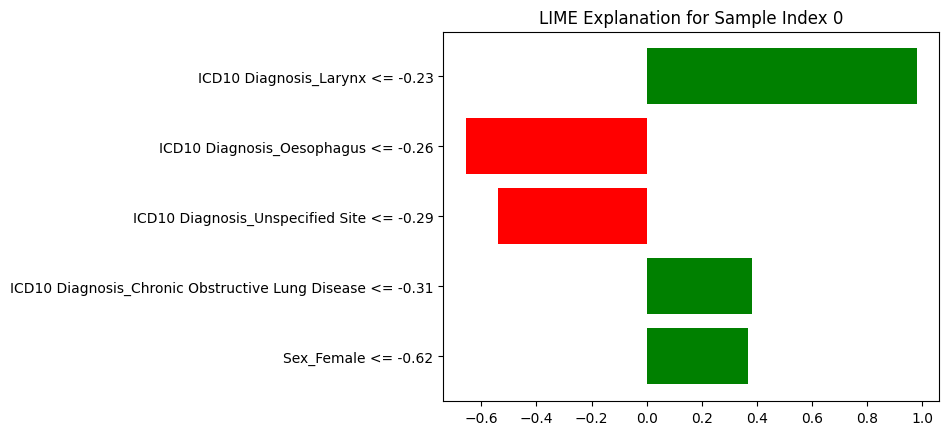

In [188]:

from lime.lime_tabular import LimeTabularExplainer
feature_names = X_train.columns  
explainer = LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=feature_names,
    mode='regression'
)
sample_index = 0  
sample_data = X_test_scaled[sample_index]
predicted_value = best_model.predict(sample_data.reshape(1, -1))
exp = explainer.explain_instance(sample_data, best_model.predict, num_features=5)
print(f"Predicted Deaths: {predicted_value[0]}")
print("LIME Explanation:")
exp.show_in_notebook(show_table=True, show_all=False)
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Sample Index {sample_index}")
plt.show()



Predicted Deaths: 7.29, which is the model's output for the given input instance.
Interpretation of Contributions:

Sex: Female, negative contribution, suggesting that being female and ha may be associated with a lower predicted death count for this case, compared to other factors.

The  diagnoses : (Unspecified site, Oesophagus, Aortic Aneurysm) all contribute negatively, which indicates that these conditions reduce the overall predicted deaths in this specific instance.

In [189]:
from joblib import dump

dump(best_model, 'best_model.joblib')

print("Model has been successfully dumped to best_model.joblib")


Model has been successfully dumped to best_model.joblib


# Conclusion


 **1)Age and Mortality:**

Tobacco deaths are high in younger individuals (16-24), but decrease in older populations due to lower exposure, suggesting that interventions for youth should be prioritized.
Treatment effectiveness also declines after 59, possibly due to the weakened immune system in older individuals.
 **2) Gender Differences:**

Men have higher tobacco-related death rates, but treatment shows a noticeable decline in their mortality rates. Women, however, experience lower death rates overall, but treatment does not significantly affect their mortality, indicating potential gaps in healthcare access or awareness.
 **3) Income Correlation:**

Middle-income individuals have a higher death toll, possibly due to lifestyle stress or limited access to healthcare. Treatment shows lesser benefits for this group, pointing to the need for targeted interventions.
 **4) Years of Mortality and Treatment:**

Tobacco-related deaths have decreased since 2010, possibly due to improved awareness, but treatment effectiveness after 2010 has diminished, which may require more focused research and better healthcare solutions.
**5) Cancer and Respiratory Diseases:**

Tobacco-related cancers, especially laryngeal and respiratory diseases, contribute significantly to deaths. Treatment has not been as effective in reducing mortality in these cases, indicating the urgent need for better treatments.
### **Conclusion:**
While treatment has helped reduce mortality in certain age groups and for males, challenges remain, particularly for older individuals and women. The high mortality rate among middle-income groups, despite treatment, and the continued prevalence of tobacco-related cancers indicate areas that require further research and intervention to combat tobacco-related health issues effectively.

### **Summary of Model Results:**

#### **Models Tested:**
For predicting the number of tobacco-related deaths, several regression models were tested to evaluate their performance:

1. **Linear Regression**: 
   - **Mean Squared Error (MSE)**: 0.1820
   - **R² Score**: 0.5875

2. **Decision Tree Regressor**:
   - **MSE**: 0.1762
   - **R² Score**: 0.6008

3. **Random Forest Regressor**:
   - **MSE**: 0.1756
   - **R² Score**: 0.6021

4. **Gradient Boosting Regressor (XGBoost)**:
   - **MSE**: 0.1734
   - **R² Score**: 0.6070

#### **Chosen Model: Gradient Boosting Regressor (XGBoost)**:
After comparing the performance of different models, the **Gradient Boosting Regressor** was chosen as the best-performing model, as it provided the lowest Mean Squared Error (MSE) and the highest R² score, indicating a strong ability to predict deaths accurately.

- **Best Hyperparameters (after GridSearchCV)**:
  - **Learning Rate**: 0.1
  - **Max Depth**: 4
  - **Min Samples Leaf**: 4
  - **Min Samples Split**: 10
  - **N Estimators**: 150

#### **Performance After Hyperparameter Tuning**:
- **Test MSE**: 0.1544
- **Test R² Score**: 0.6501
- **Cross-Validated MSE**: 0.1492 ± 0.0013

The tuning and cross-validation process improved the model’s performance, increasing its **R² score** to 0.6501 on the test set, demonstrating the model’s ability to explain a substantial portion of the variance in the target variable (Deaths).

### **Model Interpretation with LIME (Local Interpretable Model-agnostic Explanations)**:
LIME was used to interpret the model’s predictions and provide insight into the factors that contribute to the predicted number of deaths.

- **Predicted Deaths**: 7.29 (for the given input instance).
- **Interpretation of Contributions**:
  - **Sex - Female**: The contribution of being female is negative, suggesting that in this instance, being female is associated with lower predicted death numbers compared to the other factors.
  - **Other Diagnoses**: The Larynx,Oesophagus,Aortic Aneurysm has different effect.

### **Conclusion**:
The **Gradient Boosting Regressor** is the chosen model for predicting tobacco-related deaths, with the highest performance metrics (R² score of 0.6501 and MSE of 0.1544) after hyperparameter tuning. The interpretation of the model, using LIME, reveals the key factors influencing death predictions. female has a negative contribution, reflecting lower death rates compared to other factors.The dataset is still an ambiguity type and deeper insights could help to build a better model facilitating the shaping the health policies.